## Validation To-Dos

 

In [7]:
import pandas as pd
import numpy as np
from vivarium import Artifact
import os
from pathlib import Path
from db_queries import get_outputs, get_ids, get_model_results, get_population
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import gbd_mapping
from matplotlib.backends.backend_pdf import PdfPages
pd.set_option('use_inf_as_na', True)
sns.set(context = 'paper', style='whitegrid', font_scale=1.8, rc = {'axes.spines.right':False, 'axes.spines.top': False, 'figure.figsize':(12.7,8.6)}, palette='Set1')


## Change variable save_path to local directory file path for file results

In [6]:
mapping_dict_data = {'cause': {'acute_myocardial_infarction':'ischemic_heart_disease','post_myocardial_infarction':'ischemic_heart_disease','acute_ischemic_stroke':'ischemic_stroke','post_ischemic_stroke':'ischemic_stroke', 'other_causes':'other_causes', 'albuminuria':'chronic_kidney_disease', 'stage_iii_chronic_kidney_disease':'chronic_kidney_disease','stage_iv_chronic_kidney_disease':'chronic_kidney_disease','stage_v_chronic_kidney_disease':'chronic_kidney_disease','moderate_diabetes_mellitus':'diabetes_mellitus','severe_diabetes_mellitus':'diabetes_mellitus', 'chronic_kidney_disease':'chronic_kidney_disease'},
                    'sequela':{378:'acute_myocardial_infarction', 379:'acute_myocardial_infarction',380:'post_myocardial_infarction', 381:'post_myocardial_infarction', 382:'post_myocardial_infarction', 383:'post_myocardial_infarction', 384:'post_myocardial_infarction', 385:'post_myocardial_infarction', 953:'post_myocardial_infarction', 1040:'post_myocardial_infarction', 5726:'post_myocardial_infarction', 386: 'acute_ischemic_stroke', 387: 'acute_ischemic_stroke', 388: 'acute_ischemic_stroke', 389: 'acute_ischemic_stroke', 390: 'acute_ischemic_stroke', 391:'post_ischemic_stroke', 392: 'post_ischemic_stroke', 393:'post_ischemic_stroke', 394:'post_ischemic_stroke', 395:'post_ischemic_stroke', 946:'post_ischemic_stroke'},
                    'location': {'china':'China', 'brazil':'Brazil', 'france':'France', 'italy':'Italy', 'russian_federation':'Russian Federation', 'spain':'Spain'},
                    'sex':{'female':'Female','male':'Male'},
                    'measure':{'death':'deaths','ylds':'ylds','ylls':'ylls'},
                    'model_4_results':{'brazil':'brazil/2020_03_25_22_41_53','china':'china/2020_03_22_19_26_03', 'france':'france/2020_03_22_19_24_38', 'italy':'italy/2020_03_22_21_17_46', 'russian_federation':'russian_federation/2020_03_22_22_01_36', 'spain':'spain/2020_03_22_23_17_15'},
                    'model_5_results':{'brazil':'brazil/2020_03_29_23_20_34','china':'china/2020_03_29_23_20_41', 'france':'france/2020_03_29_23_20_52', 'italy':'italy/2020_03_29_23_20_47', 'spain':'spain/2020_03_29_23_20_51'}}

locations_model_4 = 'brazil'
locations = ['brazil','china','france','italy', 'russian_federation','spain']
measures = ['deaths', 'person_time','population','ylds','ylls']
save_path_j = '/home/j/Project/simulation_science/zenon/validation/model_5'

In [39]:
mapping_dict_data

{'cause': {'acute_myocardial_infarction': 'ischemic_heart_disease',
  'post_myocardial_infarction': 'ischemic_heart_disease',
  'acute_ischemic_stroke': 'ischemic_stroke',
  'post_ischemic_stroke': 'ischemic_stroke',
  'other_causes': 'other_causes',
  'albuminuria': 'chronic_kidney_disease',
  'stage_iii_chronic_kidney_disease': 'chronic_kidney_disease',
  'stage_iv_chronic_kidney_disease': 'chronic_kidney_disease',
  'stage_v_chronic_kidney_disease': 'chronic_kidney_disease',
  'moderate_diabetes_mellitus': 'diabetes_mellitus',
  'severe_diabetes_mellitus': 'diabetes_mellitus',
  'chronic_kidney_disease': 'chronic_kidney_disease'},
 'sequela': {378: 'acute_myocardial_infarction',
  379: 'acute_myocardial_infarction',
  380: 'post_myocardial_infarction',
  381: 'post_myocardial_infarction',
  382: 'post_myocardial_infarction',
  383: 'post_myocardial_infarction',
  384: 'post_myocardial_infarction',
  385: 'post_myocardial_infarction',
  953: 'post_myocardial_infarction',
  1040: 'pos

## Zenon Model 5 results







In [99]:
path_template = Path('/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks_temp')

def get_model_outputs_sequela(locations, measure):
    outcomes = pd.DataFrame([])
    try:   
    
        for location in locations:

            if location == 'russian_federation':
                outcome = pd.read_hdf(f'/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks/russian_federation/2020_03_30_15_01_53/count_data/{measure}.hdf')
            else:   
                country_loc = mapping_dict_data['model_5_results'][location]
                outcome = pd.read_hdf(str(path_template / f'{country_loc}/count_data/{measure}.hdf'))
            outcome['location'] = f'{location}'
            if measure != 'transition_count':
                outcome['measure'] = f'{measure}'
            outcomes = outcomes.append(outcome)
        return outcomes
            
    except:
            print(f'{measure} is not a measure in the outputs')

def get_model_outputs_cause(locations, measure):
    outcomes = pd.DataFrame([])
    try:   
    
        for location in locations:

            if location == 'russian_federation':
                outcome = pd.read_hdf(f'/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks/russian_federation/2020_03_30_15_01_53/count_data/{measure}.hdf')
            else:   
                country_loc = mapping_dict_data['model_5_results'][location]
                outcome = pd.read_hdf(str(path_template / f'{country_loc}/count_data/{measure}.hdf'))
            outcome['location'] = f'{location}'
            if measure != 'transition_count':
                outcome['measure'] = f'{measure}'
            outcomes = outcomes.append(outcome)
        outcomes['cause'] = outcomes.cause.map(mapping_dict_data['cause'])
        outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw','location']).value.sum().reset_index()

        return outcomes
            
    except:
            print(f'{measure} is not a measure in the outputs')

def get_pops(locations):
    outcomes = pd.DataFrame([])
    for country in locations:
        if country == 'russian_federation':
            outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks/russian_federation/2020_03_30_15_01_53/count_data/population.hdf')
        else:
            country_loc = mapping_dict_data['model_5_results'][country]
            outcome = pd.read_hdf(str(path_template / f'{country_loc}/count_data/population.hdf'))
        outcome['location'] = f'{country}'
        outcomes = outcomes.append(outcome)
    return outcomes

def get_person_time(locations):
    outcomes = pd.DataFrame([])
    for country in locations:
        if country == 'russian_federation':
            outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks/russian_federation/2020_03_30_15_01_53/count_data/person_time.hdf')
        else:
            country_loc = mapping_dict_data['model_5_results'][country]
            outcome = pd.read_hdf(str(path_template / f'{country_loc}/count_data/person_time.hdf'))
        outcome['location'] = f'{country}'
        outcomes = outcomes.append(outcome)
    outcomes = outcomes.groupby(['age_group','sex','year','input_draw', 'location']).value.sum().reset_index()
    return outcomes

deaths = get_model_outputs_sequela(locations, 'deaths')
state = get_model_outputs_sequela(locations, 'state_person_time')

def get_emr(locations, deaths, state):
    
    index_columns = ['age_group', 'sex', 'year', 'input_draw','location', 'cause']
    deaths['measure'] = 'deaths'
    deaths = deaths[((deaths.cause == 'acute_myocardial_infarction') | (deaths.cause == 'post_myocardial_infarction') | (deaths.cause == 'acute_ischemic_stroke') | (deaths.cause == 'post_ishemic_stroke'))& (deaths.year == '2020')]
    state['measure'] = 'state'
    state = state[((state.cause == 'acute_myocardial_infarction') | (state.cause == 'post_myocardial_infarction') |  (state.cause == 'acute_ischemic_stroke') | (state.cause == 'post_ischemic_stroke')) & (state.year == '2020')]
    deaths  = deaths.set_index(index_columns).value
    state = state.set_index(index_columns).value
    rates = deaths / state * 100_000
    rates = rates.reset_index()
    rates['value'] = rates['value'].fillna(0)
    rates['measure'] = 'excess_mortality_rate'
    rates['sex'] = rates.sex.map(mapping_dict_data['sex'])
    return rates

def get_transition(locations):
    outcomes = pd.DataFrame([])
    for country in locations:
        if country == 'russian_federation':
            outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v5.0_correlated_risks/russian_federation/2020_03_30_15_01_53/count_data/transition_count.hdf')
        else:
            country_loc = mapping_dict_data['model_5_results'][country]
            df = pd.read_hdf(str(path_template / f'{country_loc}/count_data/transition_count.hdf'))
        df['location'] = f'{country}'
        outcomes = outcomes.append(df)
    return outcomes

def get_transition_susceptible_to_acute(locations):
    transitions = get_model_outputs_sequela(locations, 'transition_count')
    transitions = transitions[transitions.measure.str.startswith('susceptible')]
    transitions['susceptible'] = transitions.measure.str.extract('((?<=to_).*?(?=_to))',expand = False)
    transitions['cause'] = transitions.measure.str.extract('((?<=to_).*?(?=_event_count))',expand = False)
    transitions['cause'] = transitions.cause.str.extract('((?<=_to_).*)', expand = False)
    transitions = transitions.drop('measure', axis = 1)
    return transitions

def get_transition_post_to_acute(locations):    
    transitions = get_model_outputs_sequela(locations, 'transition_count')
    transitions = transitions[transitions.measure.str.startswith('post')]
    transitions['susceptible'] = transitions.measure.str.extract('(.*?(?=_to))',expand = False)
    transitions['cause'] = transitions.measure.str.extract('((?<=to_).*?(?=_event_count))',expand = False)
    transitions = transitions.drop('measure', axis = 1)
    return transitions

susceptible_to_acute = get_transition_susceptible_to_acute(locations)
post_to_acute = get_transition_post_to_acute(locations)


def collapse_frame(df, column):
    return(df.groupby([x for x in df.columns if x not in ['value',column]])['value'].sum().reset_index())

def get_incidence(susceptible_to_acute, post_to_acute, locations, risk_strat = False, final_cause_strat = False):
    transitions = pd.concat([susceptible_to_acute, post_to_acute])
    state = get_model_outputs_sequela(locations, 'state_person_time')
    state = state.groupby(['age_group','sex','year','cause','input_draw','location', 'measure']).value.sum().reset_index()
    state = state[(state.cause.str.contains('susceptible')) | (state.cause.str.contains('post'))]
    state['susceptible'] = state.cause.str.replace('susceptible_to_', '')
    state = state.drop(['cause', 'measure'], axis = 1)
    if not risk_strat:
        state = collapse_frame(state, 'cvd_risk_category')
        transitions = collapse_frame(transitions, 'cvd_risk_category')
    if not final_cause_strat:
        transitions = collapse_frame(transitions, 'cause')
    transitions = transitions.set_index([x for x in transitions.columns if x != 'value']).value
    state = state.set_index([x for x in state.columns if x != 'value']).value
    incidence = (transitions.div(state) * 100000).reset_index()
    incidence['measure'] = 'incidence'
    if 'cause' not in incidence.columns:
        incidence.rename(columns = {'susceptible':'cause'}, inplace = True)
    incidence['cause'] = incidence.cause.map(mapping_dict_data['cause'])
    incidence = incidence.groupby(['age_group','sex','year','cause','input_draw','location', 'measure']).value.sum().reset_index()

    return incidence

def get_cause_specific_rates(locations):
    ylds = get_model_outputs_cause(locations, 'ylds')
    ylds['measure'] = 'ylds'
    ylls = get_model_outputs_cause(locations, 'ylls')
    ylls['measure'] = 'ylls'
    deaths = get_model_outputs_cause(locations, 'deaths')
    deaths['measure'] = 'deaths'
    state = get_model_outputs_cause(locations, 'state_person_time')
    state['measure'] = 'prevalence'
    measures = pd.concat([ylds, ylls, deaths, state])
    person_time = get_person_time(locations)
    index_columns = ['age_group', 'sex', 'year', 'input_draw','location']
    measures = measures.set_index(index_columns + ['cause', 'measure']).value
    person_time = person_time.set_index(index_columns).value
    rates = measures / person_time * 100_000
    rates = rates.reset_index().append(get_incidence(susceptible_to_acute, post_to_acute, locations))
    rates['sex'] = rates.sex.map(mapping_dict_data['sex'])
    
    return rates

## Model 4 Zenon results (for comparison against 5)

In [15]:
#model rerun

#deaths cause mapping disabled for emr calculation
def get_deaths_model_4():
    outcomes = pd.DataFrame([])
    outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/deaths.hdf')
    outcome['location'] = 'brazil'
    outcomes = outcomes.append(outcome)
    outcomes['cause'] = outcomes.cause.map(mapping_dict_data['cause'])
    outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw', 'location']).value.sum().reset_index()
    return outcomes

def get_pops_model_4():
    outcomes = pd.DataFrame([])
    outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/population.hdf')
    outcome['location'] = 'brazil'
    outcomes = outcomes.append(outcome)
    return outcomes

def get_ylls_model_4():
    outcomes = pd.DataFrame([])
    outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/ylls.hdf')
    outcome['location'] = 'brazil'
    outcomes = outcomes.append(outcome)
    outcomes['cause'] = outcomes.cause.map(mapping_dict_data['cause'])
    outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw', 'location']).value.sum().reset_index()
    return outcomes

def get_ylds_model_4():
    outcomes = pd.DataFrame([])
    outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/ylds.hdf')
    outcome['location'] = 'brazil'
    outcomes = outcomes.append(outcome)
    outcomes['cause'] = outcomes.cause.map(mapping_dict_data['cause'])
    outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw', 'location']).value.sum().reset_index()
    return outcomes

def get_person_time_model_4():
    outcomes = pd.DataFrame([])
    outcome = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/person_time.hdf')
    outcome['location'] = 'brazil'
    outcomes = outcomes.append(outcome)
    outcomes = outcomes.groupby(['age_group','sex','year','input_draw', 'location']).value.sum().reset_index()
    return outcomes

#state cause mapping disabled for emr calculation
def get_state_model_4():
    outcomes = pd.DataFrame([])
    df = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/state_person_time.hdf')
    df['location'] = 'brazil'
    outcomes = outcomes.append(df)
    outcomes['cause'] = outcomes.cause.map(mapping_dict_data['cause'])
    outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw','location']).value.sum().reset_index()
    return outcomes

def get_emr_model_4(locations_model_4, deaths_model_4, state_model_4):
    
    index_columns = ['age_group', 'sex', 'year', 'input_draw','location', 'cause']
    deaths['measure'] = 'deaths'
    deaths = deaths[(deaths.cause == 'acute_myocardial_infarction') | (deaths.cause == 'post_myocardial_infarction') & (deaths.year == '2020')]
    state['measure'] = 'state'
    state = state[(state.cause == 'acute_myocardial_infarction') | (state.cause == 'post_myocardial_infarction') & (state.year == '2020')]
    deaths  = deaths.set_index(index_columns).value
    state = state.set_index(index_columns).value
    rates = deaths / state * 100_000
    rates = rates.reset_index()
    rates['value'] = rates['value'].fillna(0)
    rates['measure'] = 'excess_mortality_rate'
    rates['sex'] = rates.sex.map(mapping_dict_data['sex'])
    return rates

def get_state_no_mapping_model_4():
    outcomes = pd.DataFrame([])
    df = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/state_person_time.hdf')
    df['location'] = 'brazil'
    outcomes = outcomes.append(df)
    outcomes = outcomes.groupby(['age_group','sex','year','cause','input_draw','measure', 'location']).value.sum().reset_index()
    return outcomes

def get_transition_model_4():
    outcomes = pd.DataFrame([])

    df = pd.read_hdf('/share/costeffectiveness/results/vivarium_csu_zenon/v4.1_cvd_risk/brazil/2020_03_25_22_41_53/count_data/transition_count.hdf')
    df['location'] = 'brazil'
    outcomes = outcomes.append(df)
    return outcomes

def collapse_frame(df, column):
    return(df.groupby([x for x in df.columns if x not in ['value',column]])['value'].sum().reset_index())

def get_incidence_model_4(risk_strat = False, final_cause_strat = False):
    transitions = get_transition_model_4()
    transitions = transitions[transitions.measure.str.startswith('susceptible')]
    transitions['susceptible'] = transitions.measure.str.extract('((?<=to_).*?(?=_to))',expand = False)
    transitions['cause'] = transitions.measure.str.extract('((?<=to_).*?(?=_event_count))',expand = False)
    transitions['cause'] = transitions.cause.str.extract('((?<=_to_).*)', expand = False)
    transitions = transitions.drop('measure', axis = 1)
    state = get_state_no_mapping_model_4()
    state = state[state.cause.str.contains('susceptible')]
    state['susceptible'] = state.cause.str.replace('susceptible_to_', '')
    state = state.drop(['cause', 'measure'], axis = 1)
    if not risk_strat:
        state = collapse_frame(state, 'cvd_risk_category')
        transitions = collapse_frame(transitions, 'cvd_risk_category')
    if not final_cause_strat:
        transitions = collapse_frame(transitions, 'cause')
    transitions = transitions.set_index([x for x in transitions.columns if x != 'value']).value
    state = state.set_index([x for x in state.columns if x != 'value']).value
    incidence = (transitions.div(state) * 100000).reset_index()
    incidence['measure'] = 'incidence'
    if 'cause' not in incidence.columns:
        incidence.rename(columns = {'susceptible':'cause'}, inplace = True)
    return incidence

def get_cause_specific_rates_model_4():
    ylds = get_ylds_model_4()
    ylds['measure'] = 'ylds'
    ylls = get_ylls_model_4()
    ylls['measure'] = 'ylls'
    deaths = get_deaths_model_4()
    deaths['measure'] = 'deaths'
    state = get_state_model_4()
    state['measure'] = 'prevalence'
    measures = pd.concat([ylds, ylls, deaths, state])
    person_time = get_person_time_model_4()
    index_columns = ['age_group', 'sex', 'year', 'input_draw','location']
    measures = measures.set_index(index_columns + ['cause', 'measure']).value
    person_time = person_time.set_index(index_columns).value
    rates = measures / person_time * 100_000
    rates = rates.reset_index().append(get_incidence_model_4())
    rates['sex'] = rates.sex.map(mapping_dict_data['sex'])
    
    return rates

In [5]:
deaths_model_4 = get_deaths(locations)

In [45]:
deaths = get_deaths_sequela(locations)
state = get_state_sequela(locations)


In [46]:
emr = get_emr(locations, deaths, state)

In [16]:
rates_model_4 = get_cause_specific_rates_model_4()

/share/code/santonis/miniconda/envs/validation/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [30]:
gbd = get_gbd_outputs_all(locations)


In [27]:
rates = get_cause_specific_rates(locations)

In [129]:
gbd_sequela = get_gbd_outputs_sequela_all(locations)

## IHD disease state prevalence by age group

### Compare Zenon Model 4 vs. Model 5

* Country = 'Brazil'

In [96]:
def plot_results_5_compare_model_4(rates_model_4, rates):

    cause_names = ['chronic_kidney_disease','diabetes_mellitus','ischemic_heart_disease', 'ischemic_stroke']
    rates_model_4['model'] = 'model_4'
    rates['model'] = 'model_5'
    rates = rates[(rates.location == 'brazil')]
    both_models = pd.concat([rates_model_4, rates])
    
    for cause in cause_names:
        with PdfPages(f'/home/j/Project/simulation_science/zenon/validation/model_5/{cause}_model_5_compare_4.pdf') as pdf:        
            for sex in ['Male', 'Female']:
                for measure in ['deaths','ylls', 'ylds', 'prevalence', 'incidence']:
                    for location in ['brazil']:
                        
                        data = both_models[(both_models.cause == cause) & (both_models.sex == sex) & (both_models.measure == measure) & (both_models.location == location) & (both_models.year == '2020')]
                        data_m =data.groupby(['age_group', 'model']).value.mean().reset_index()

#                             if cause == 'chronic_kidney_disease' and measure == 'ylls' and sex == 'Male':
#                                 df = data_m 
#                                 return (cause, sex, measure, location)
                        g = sns.lineplot(x='age_group', y='value',
                                        linewidth=4, alpha=0.2,hue='model',
                                        data=data_m)

                        g.set_title(f'{cause} {measure} in {location}, {sex}')
                        plt.xticks(rotation=70)
                        g.set_xlabel('Age group')
                        g.set_ylabel(f'{measure} per 100k person-years')

                        pdf.savefig(orientation = 'landscape', bbox_inches='tight')

                        plt.show()
                        plt.clf() 


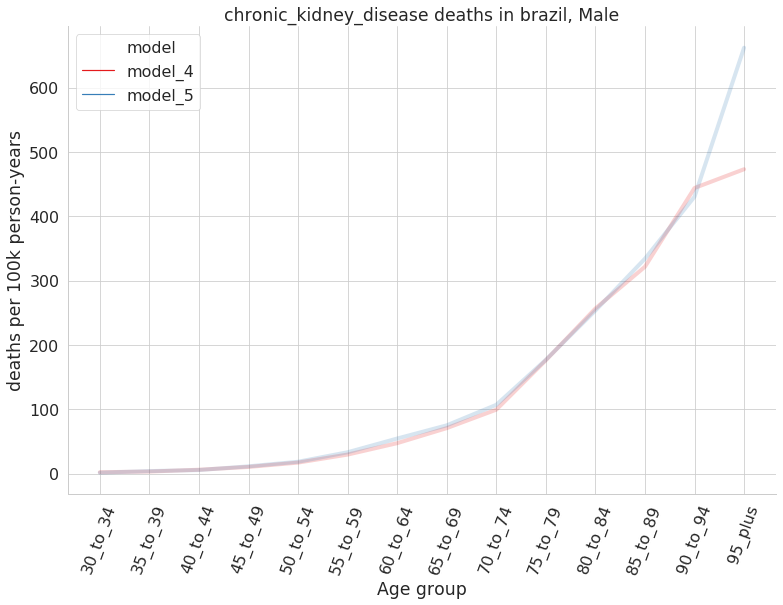

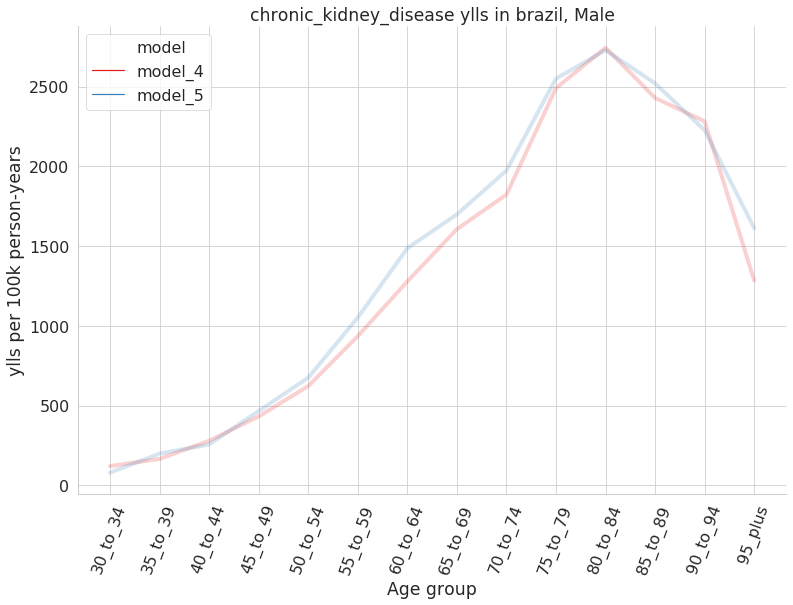

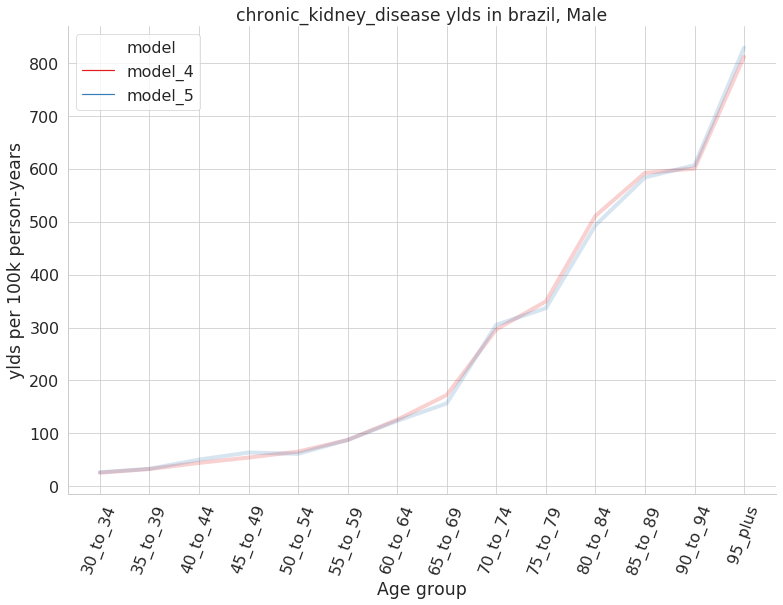

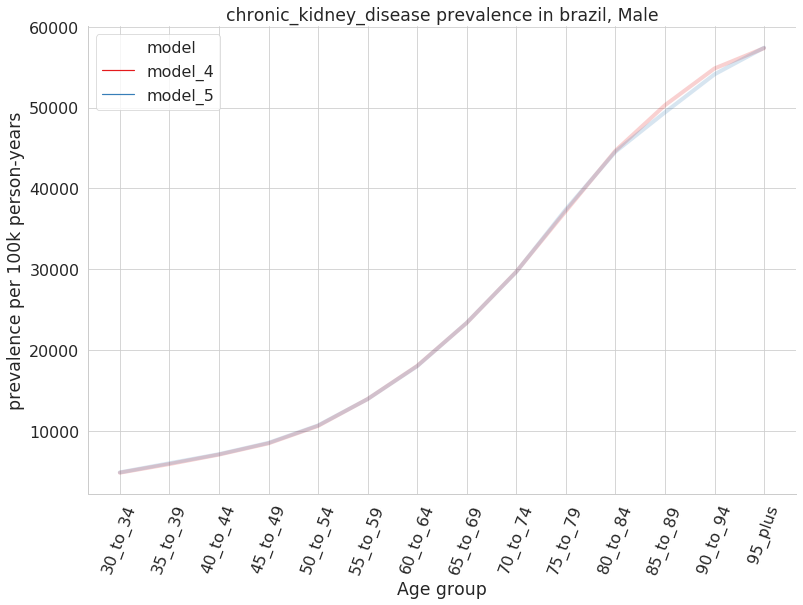

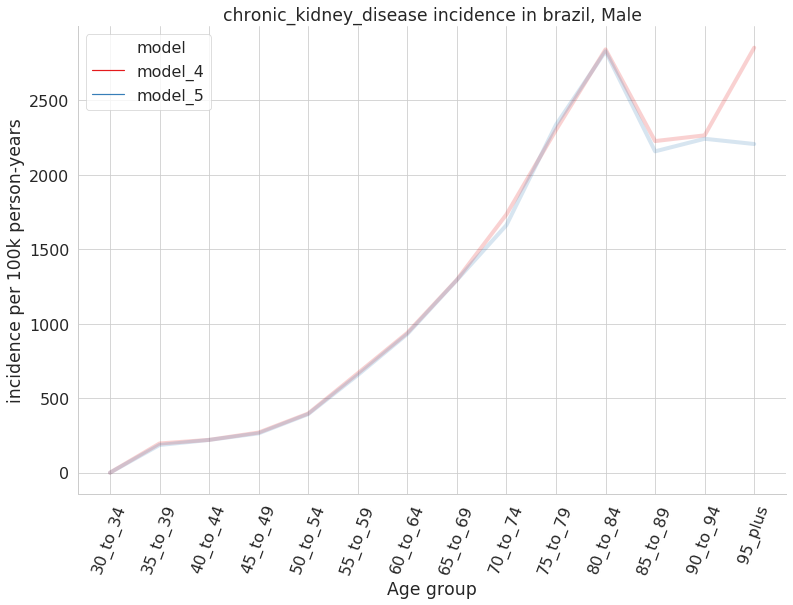

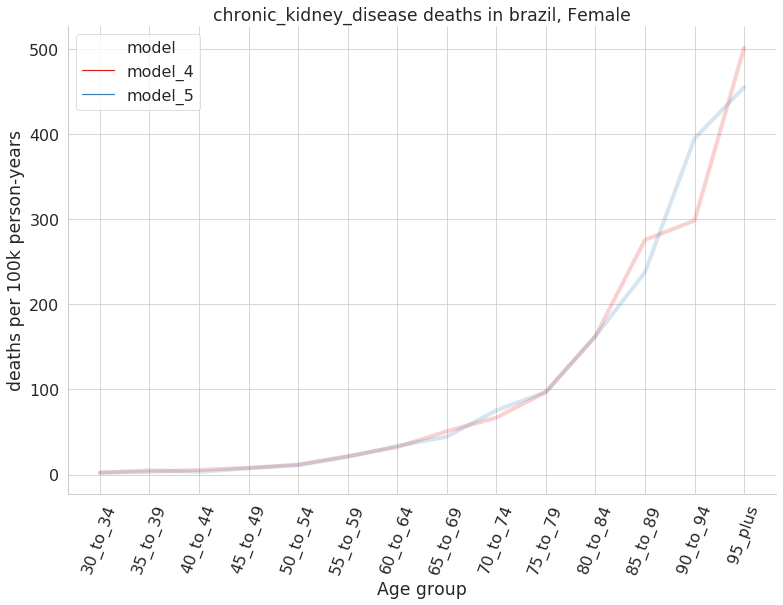

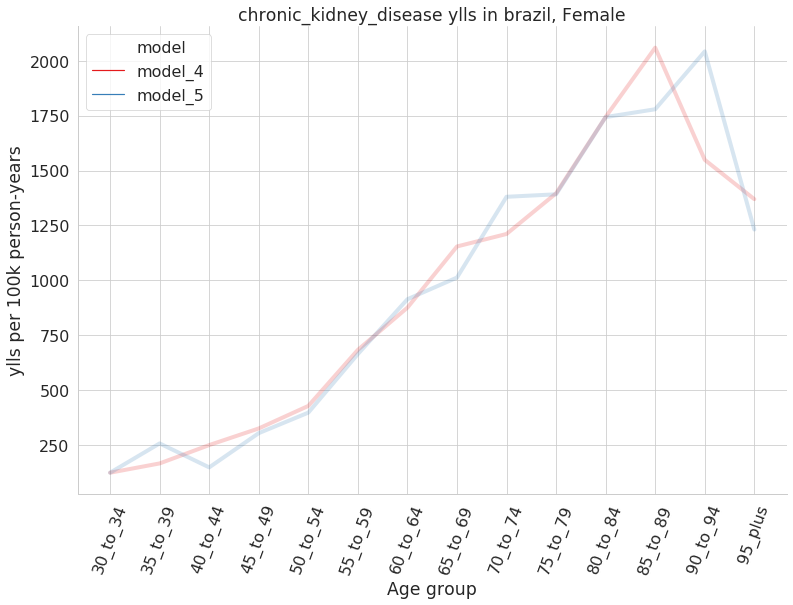

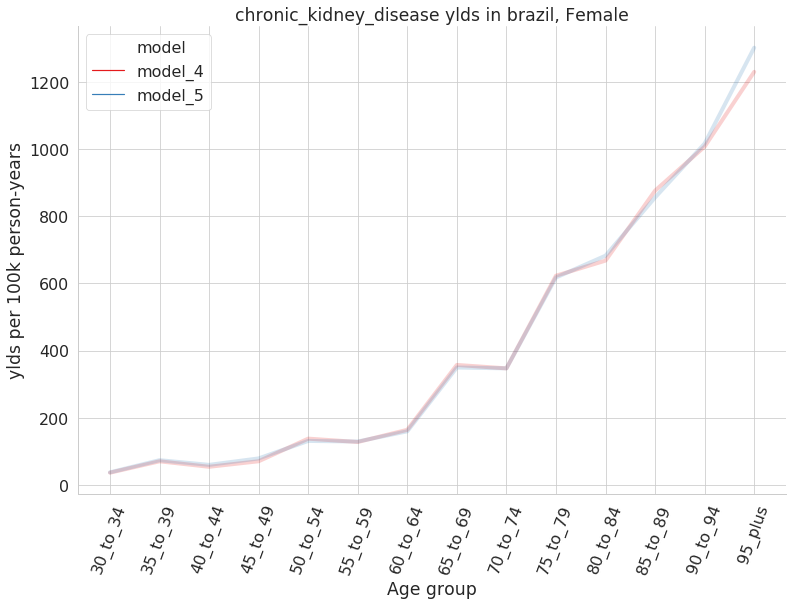

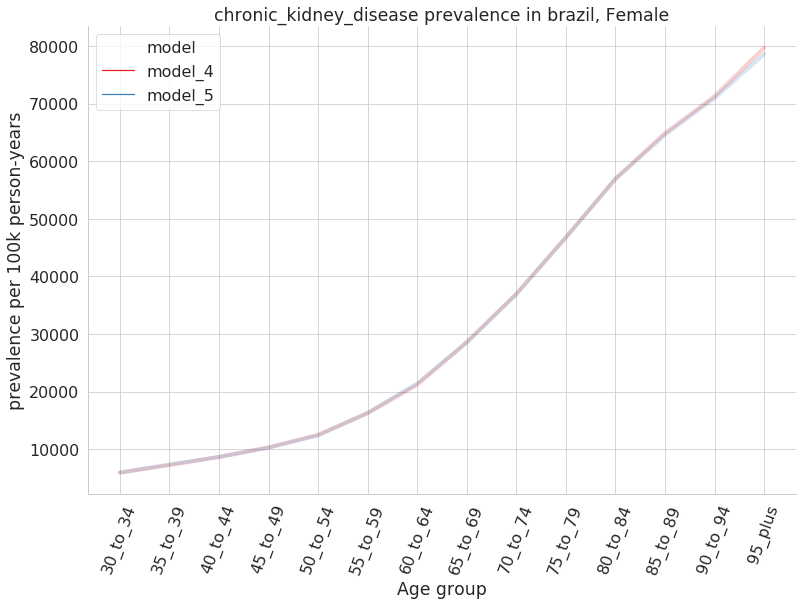

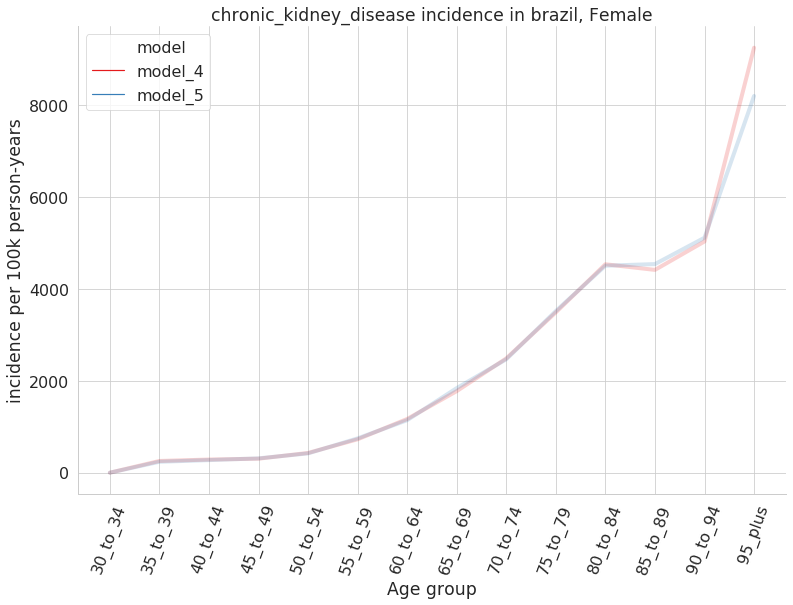

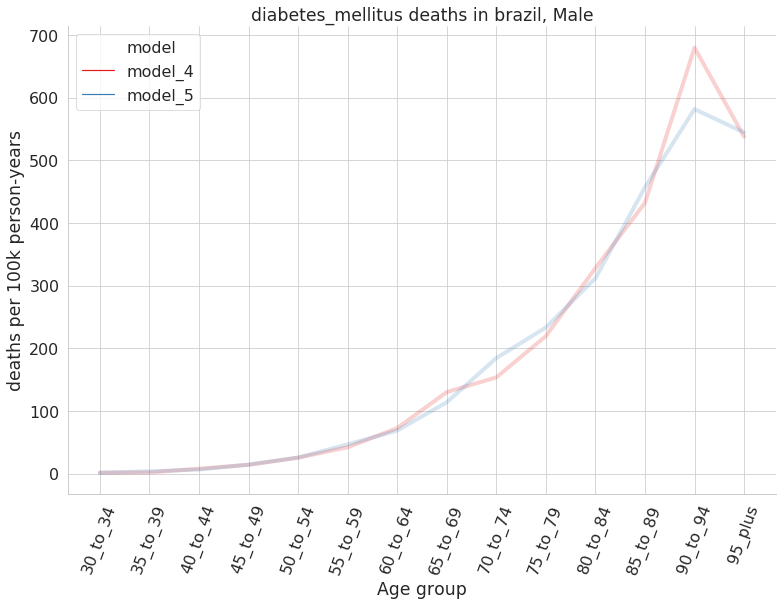

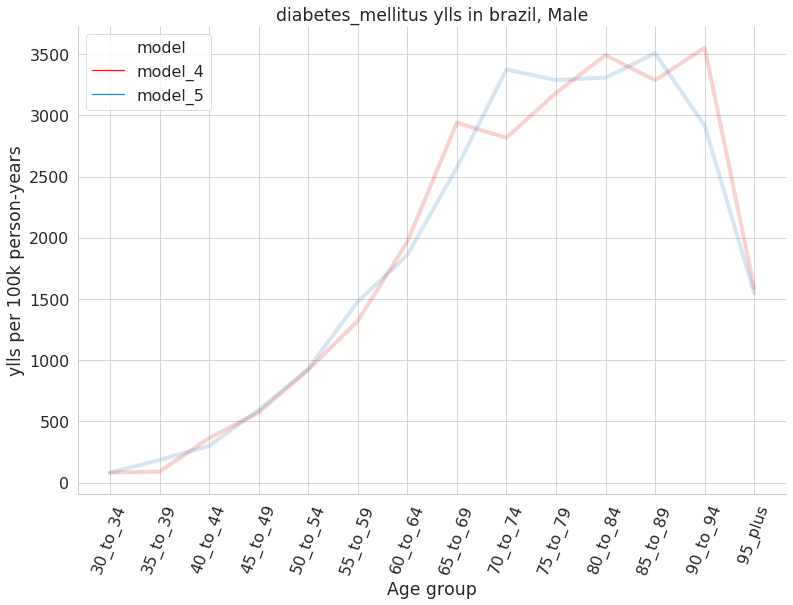

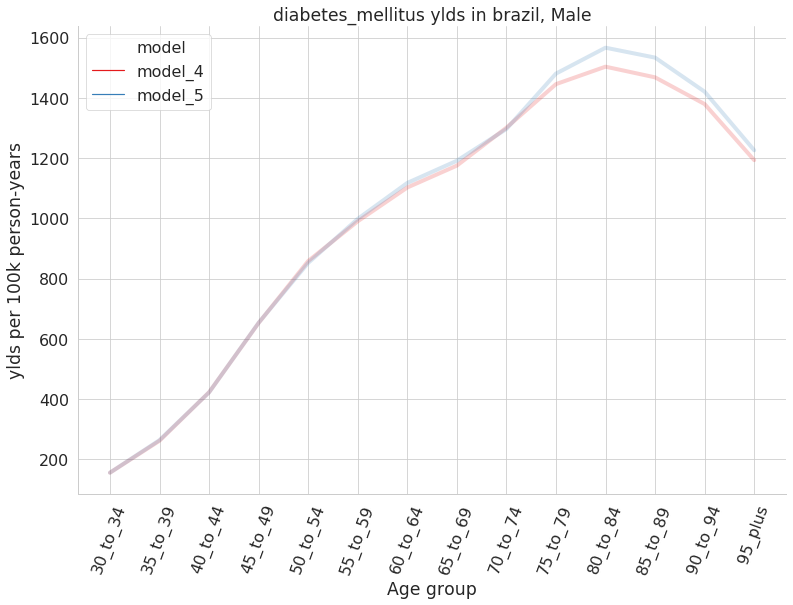

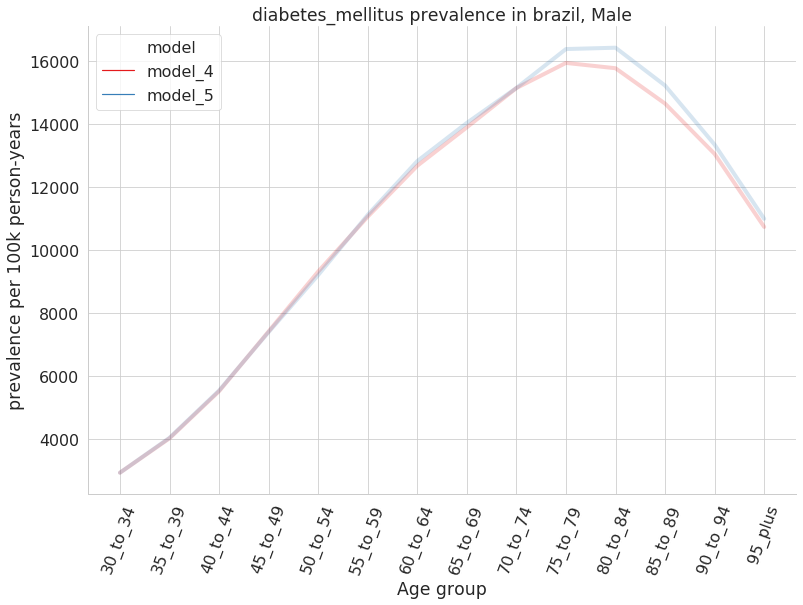

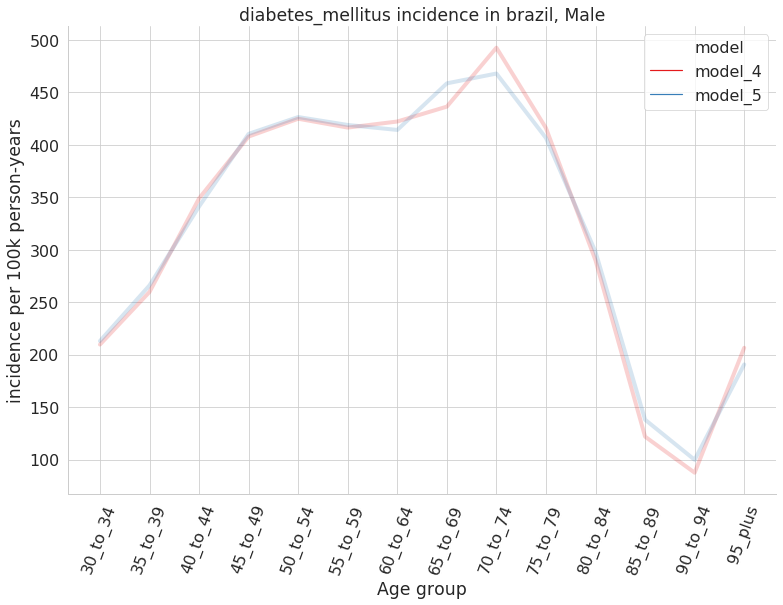

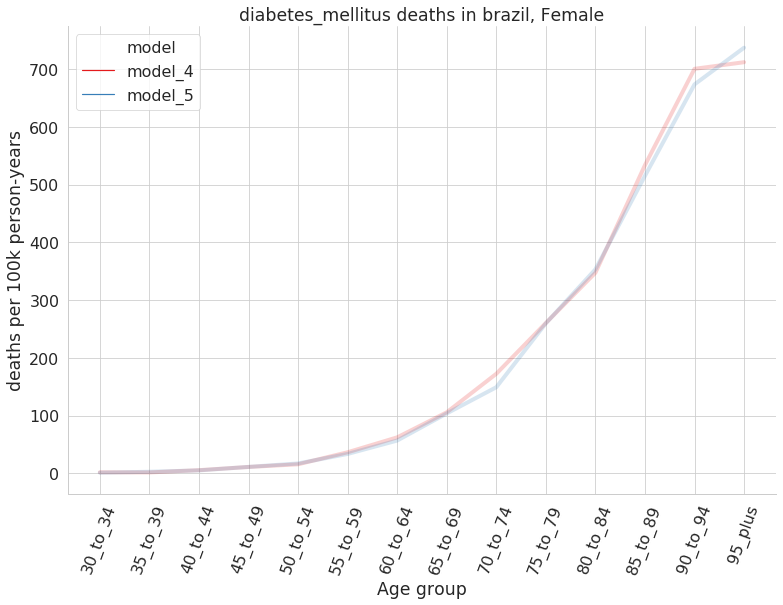

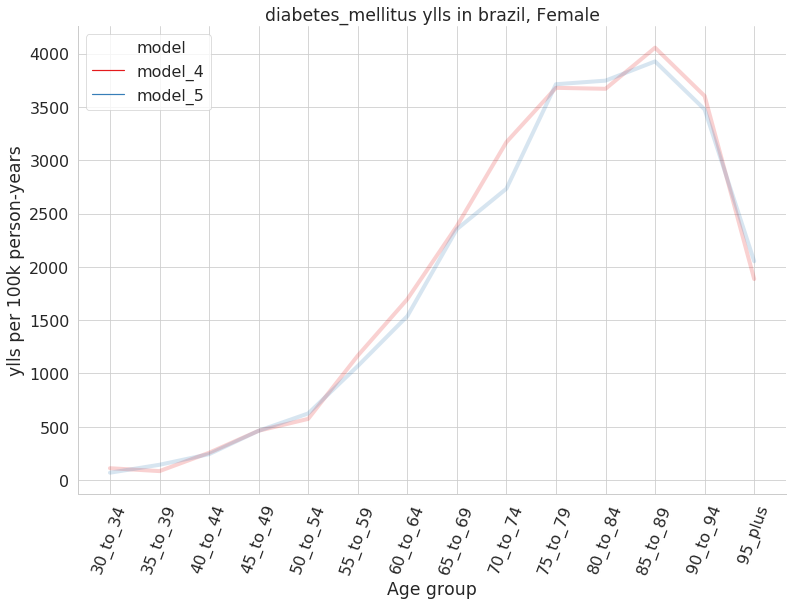

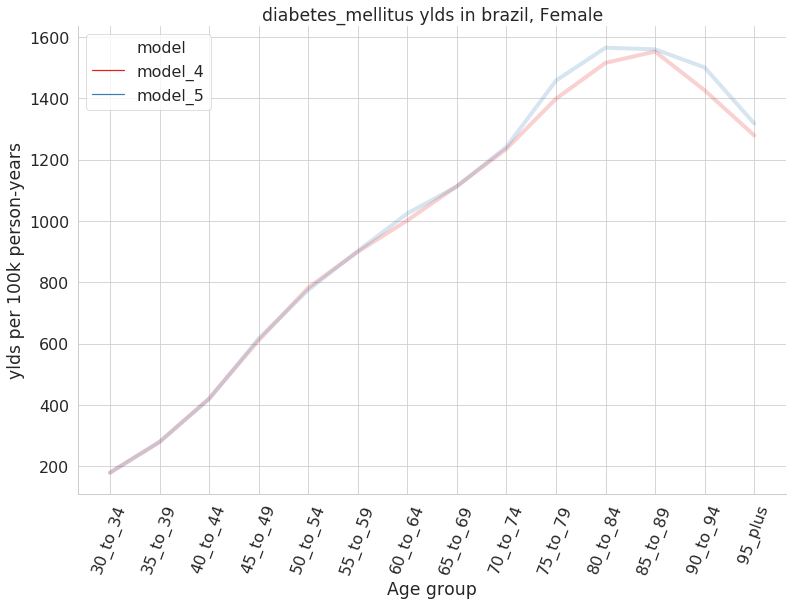

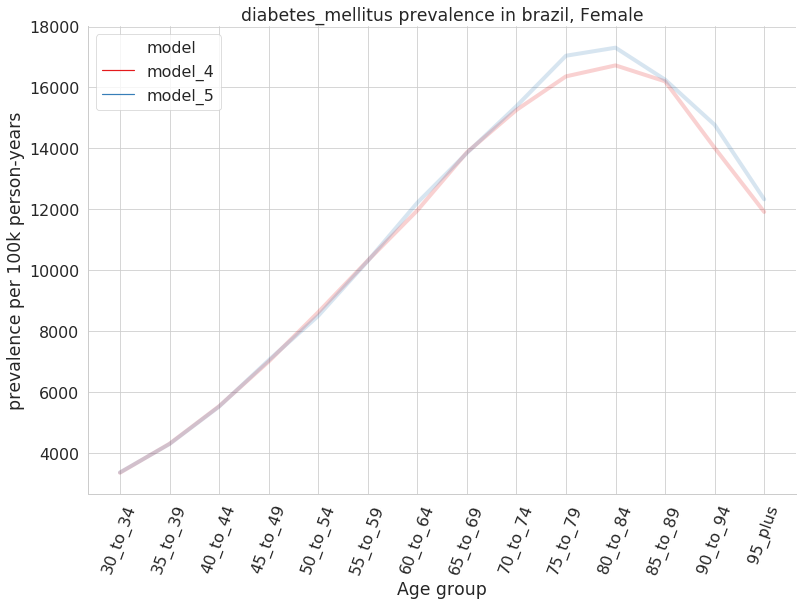

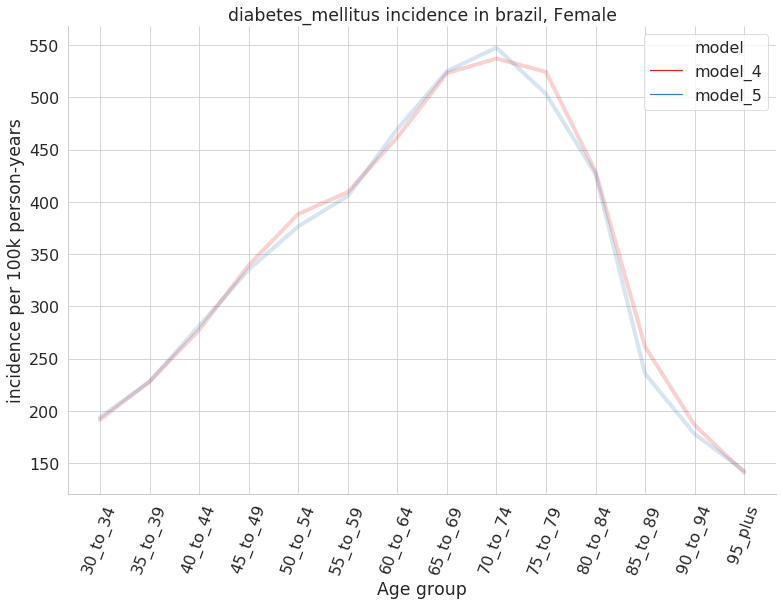

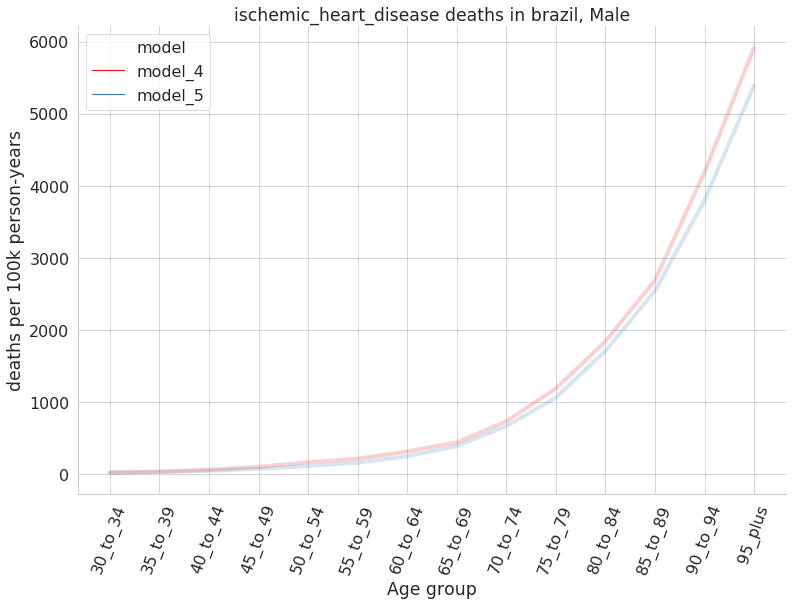

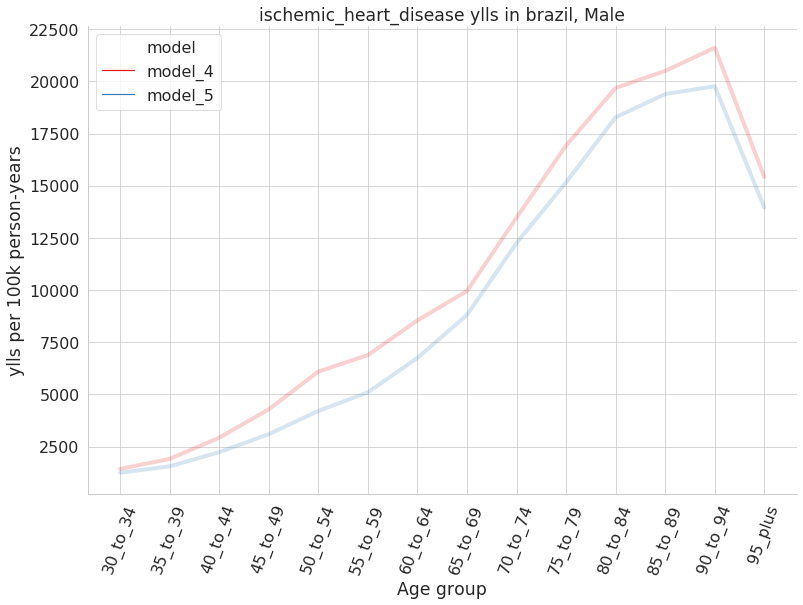

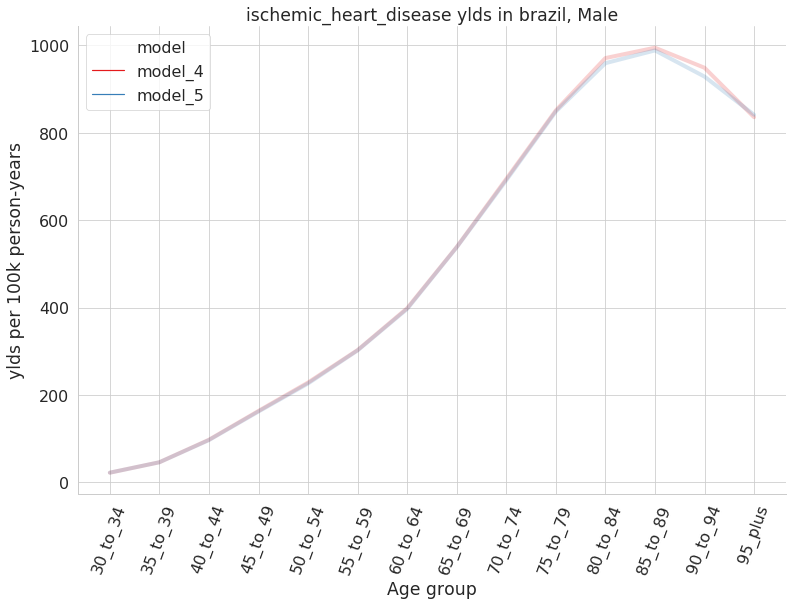

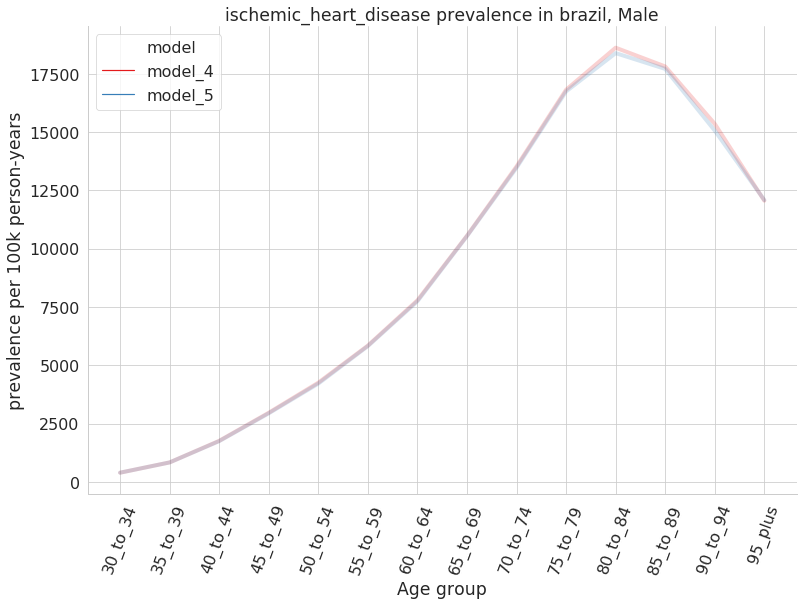

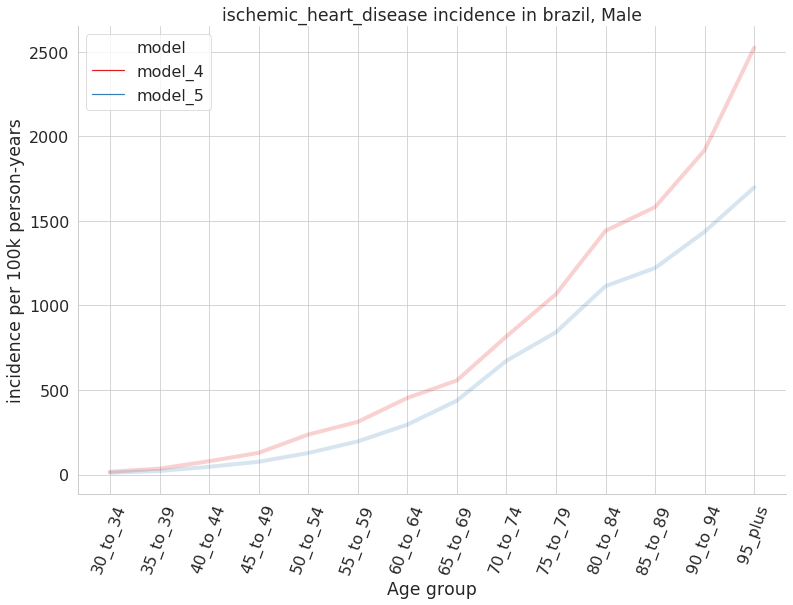

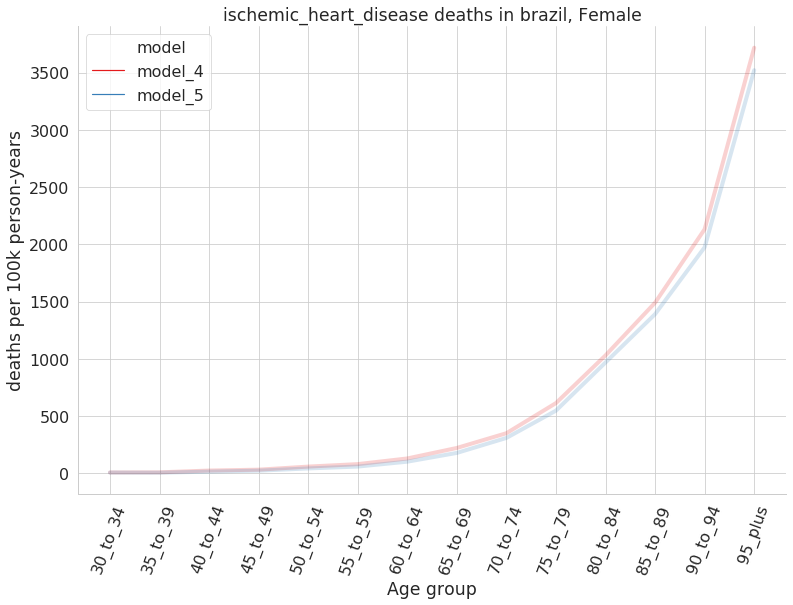

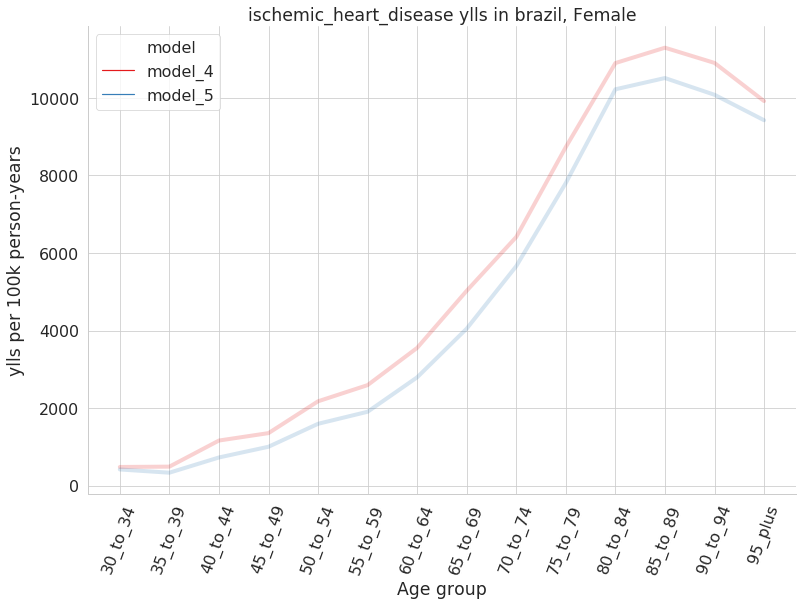

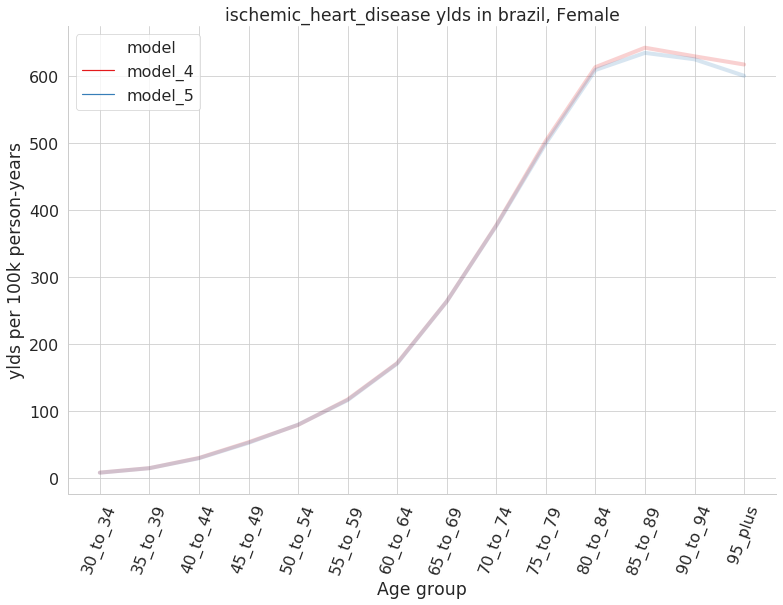

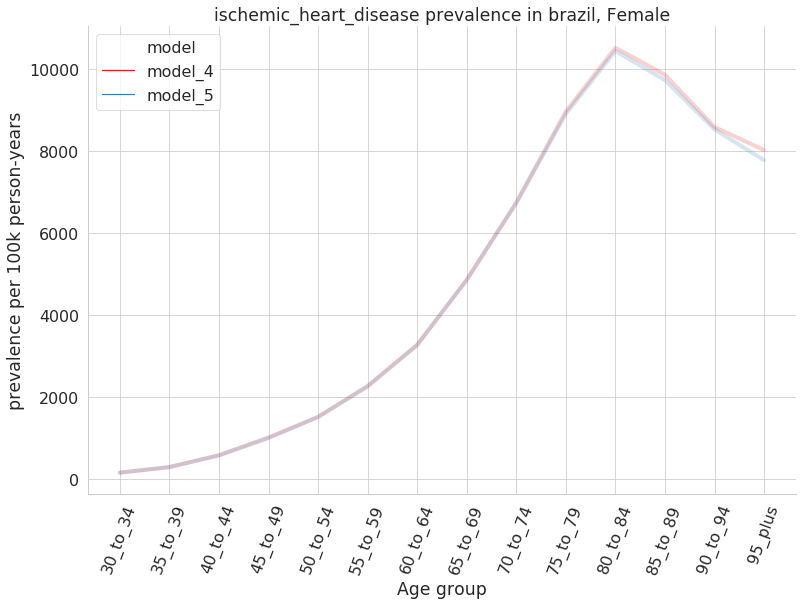

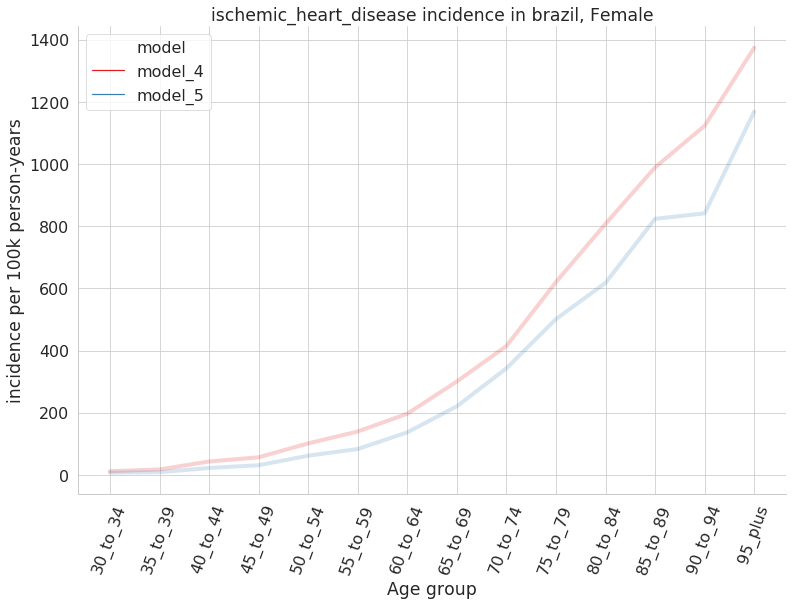

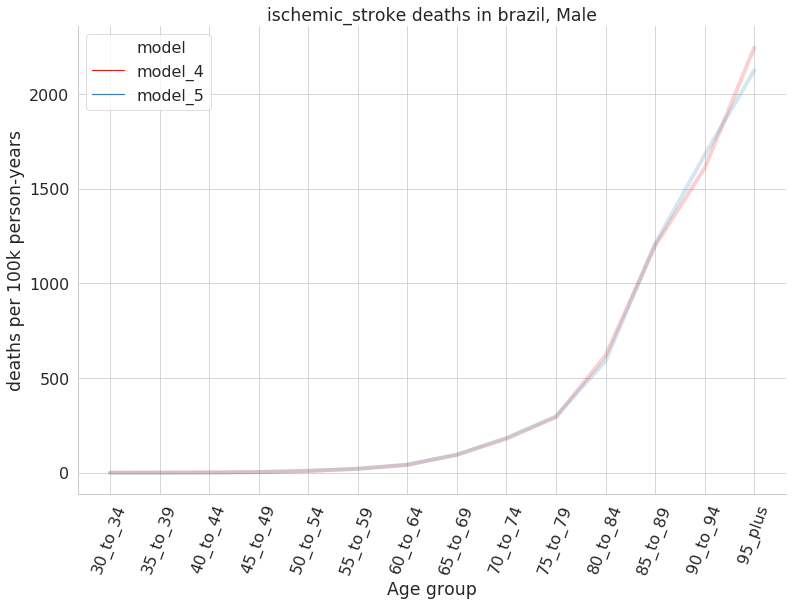

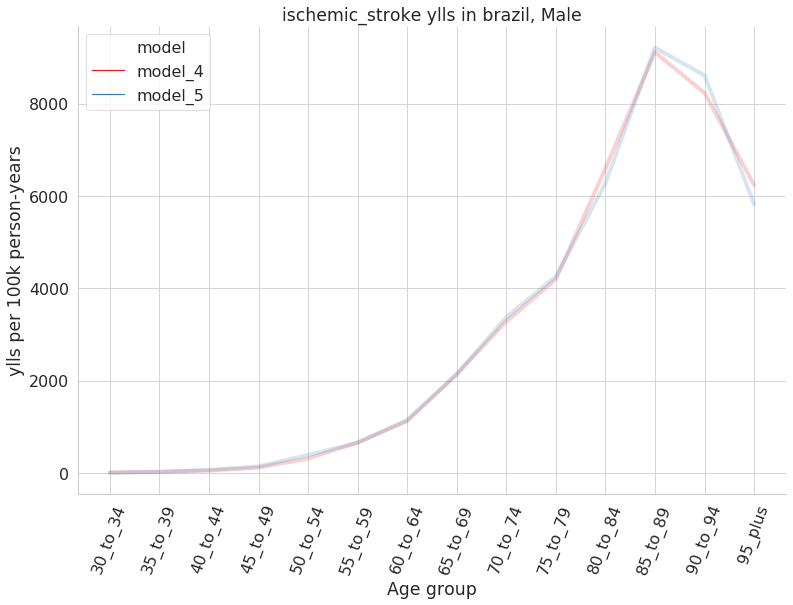

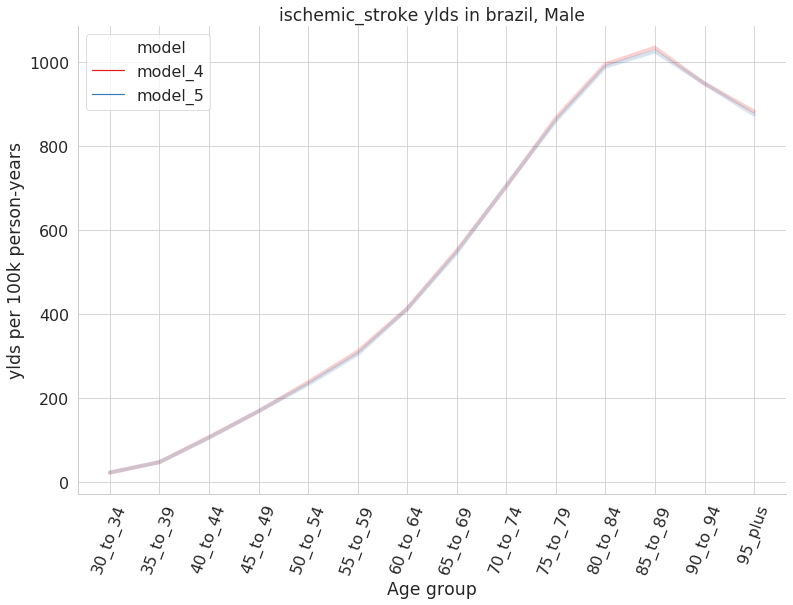

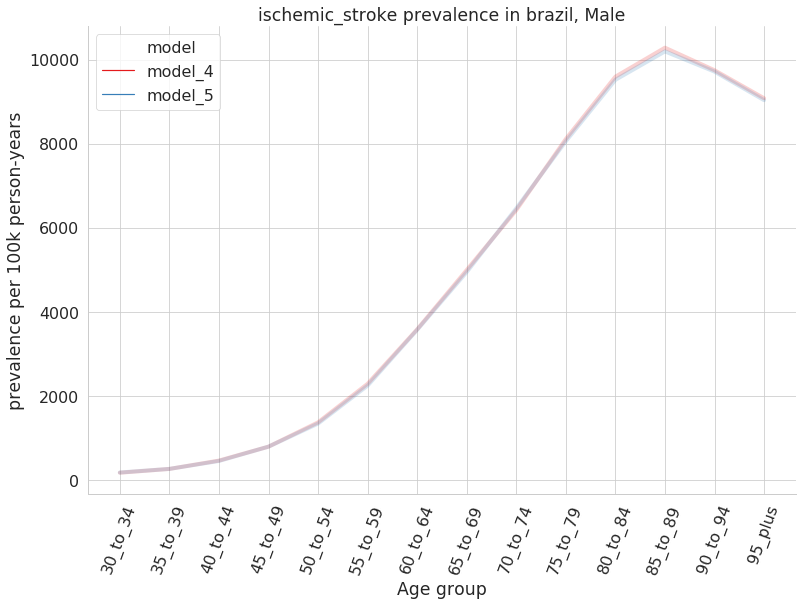

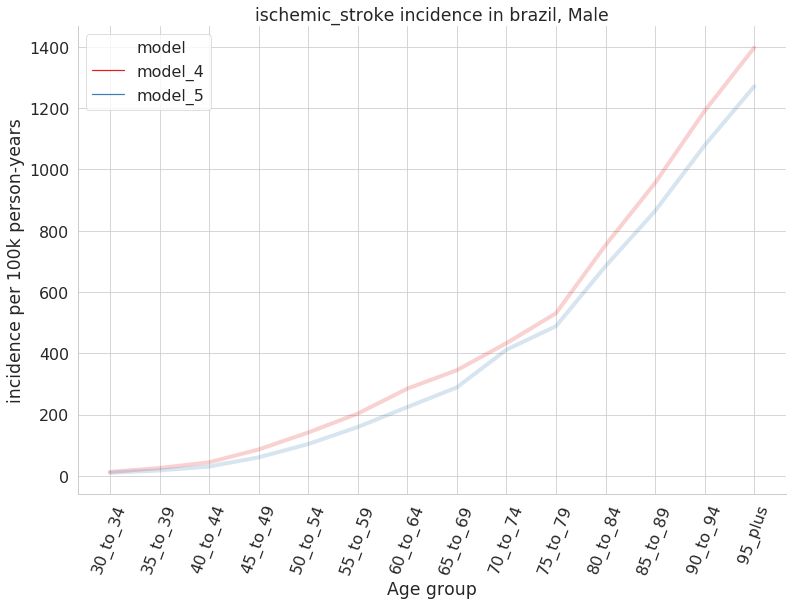

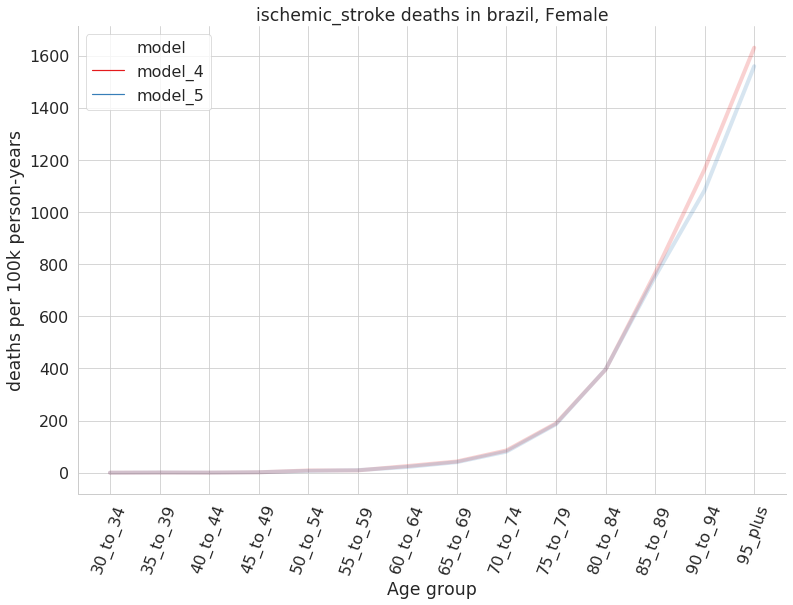

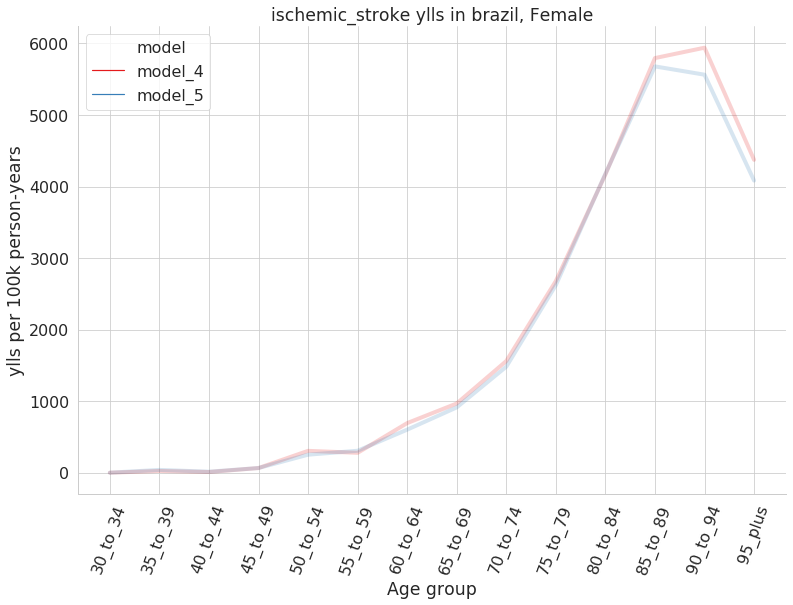

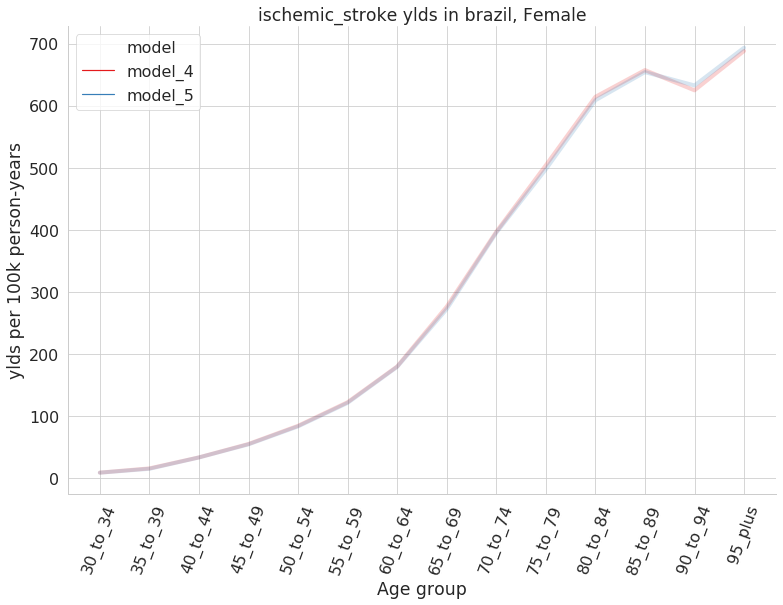

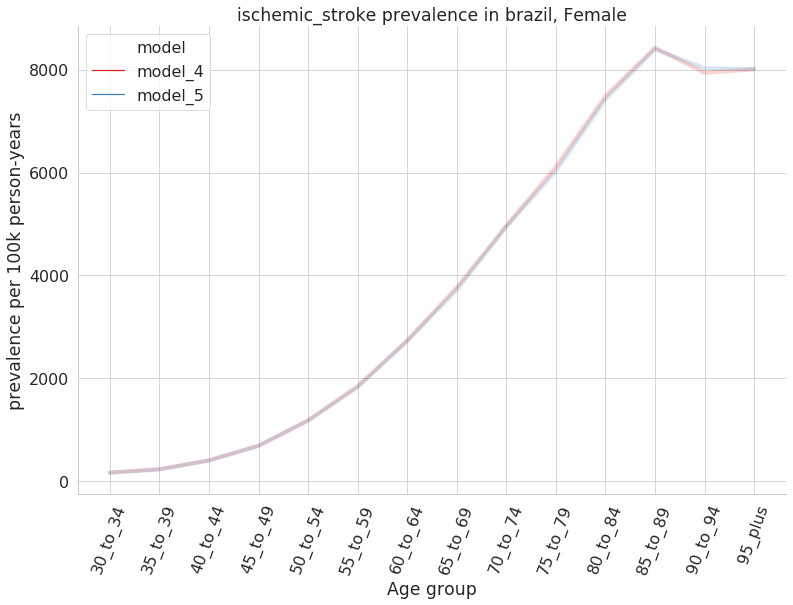

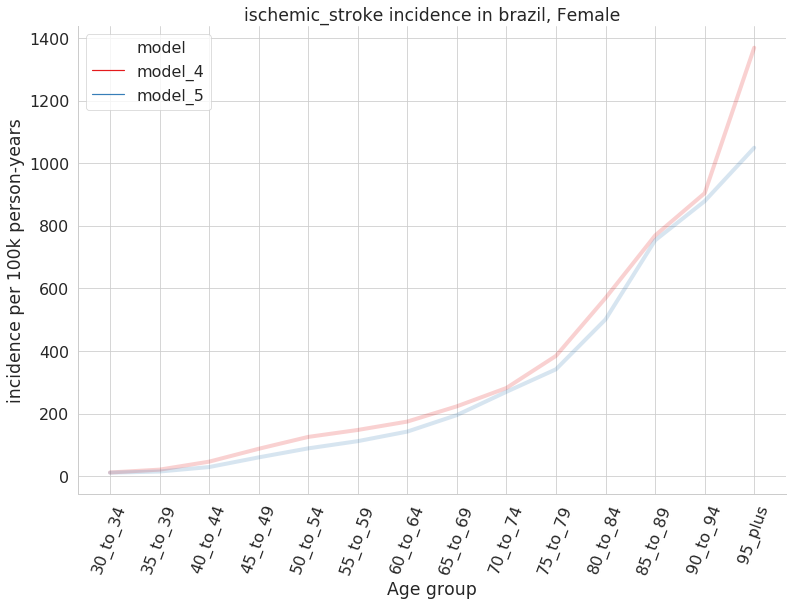

AttributeError: 'NoneType' object has no attribute 'finalize'

<Figure size 914.4x619.2 with 0 Axes>

In [97]:
plot_results_5_compare_model_4(rates_model_4, rates)

In [22]:
def plot_results_5_compare_model_4_cause_measure(rates_model_4, rates):

    cause_names = ['chronic_kidney_disease','diabetes_mellitus','ischemic_heart_disease', 'ischemic_stroke']
    rates_model_4['model'] = 'model_4'
    rates['model'] = 'model_5'
    rates = rates[(rates.location == 'brazil')]
    both_models = pd.concat([rates_model_4, rates])
    
    for cause in cause_names:
        for measure in ['deaths','ylls', 'ylds', 'prevalence', 'incidence']:
            for location in ['brazil']:
                with PdfPages(f'/home/j/Project/simulation_science/zenon/validation/model_5/compare_model_4_and_5_results/cause_measure_location/{cause}_{measure}_{location}_model_5_compare_4.pdf') as pdf:        
                    for sex in ['Male', 'Female']:

                        data = both_models[(both_models.cause == cause) & (both_models.sex == sex) & (both_models.measure == measure) & (both_models.location == location) & (both_models.year == '2020')]
                        data_m =data.groupby(['age_group', 'model']).value.mean().reset_index()

    #                             if cause == 'chronic_kidney_disease' and measure == 'ylls' and sex == 'Male':
    #                                 df = data_m 
    #                                 return (cause, sex, measure, location)
                        g = sns.lineplot(x='age_group', y='value',
                                        linewidth=4, alpha=0.2,hue='model',
                                        data=data_m)

                        g.set_title(f'{cause} {measure} in {location}, {sex}')
                        plt.xticks(rotation=70)
                        g.set_xlabel('Age group')
                        g.set_ylabel(f'{measure} per 100k person-years')

                        pdf.savefig(orientation = 'landscape', bbox_inches='tight')

                        plt.show()
                        plt.clf() 
    

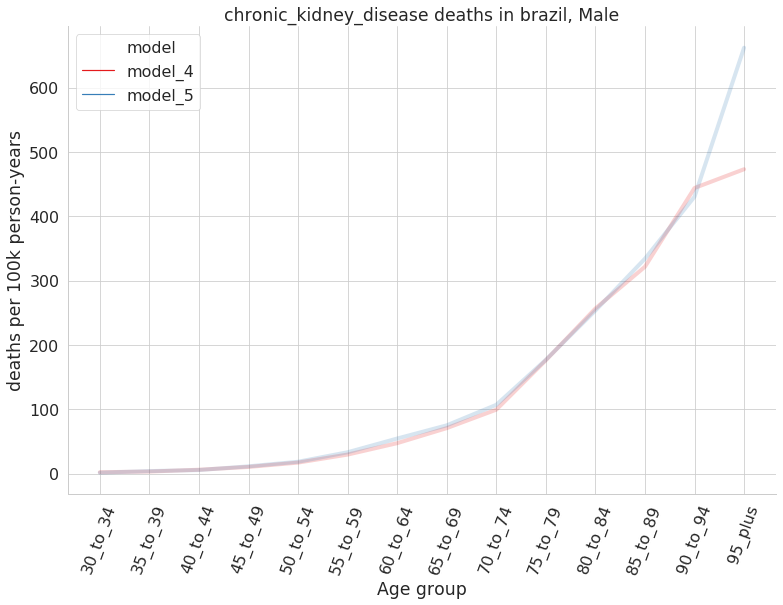

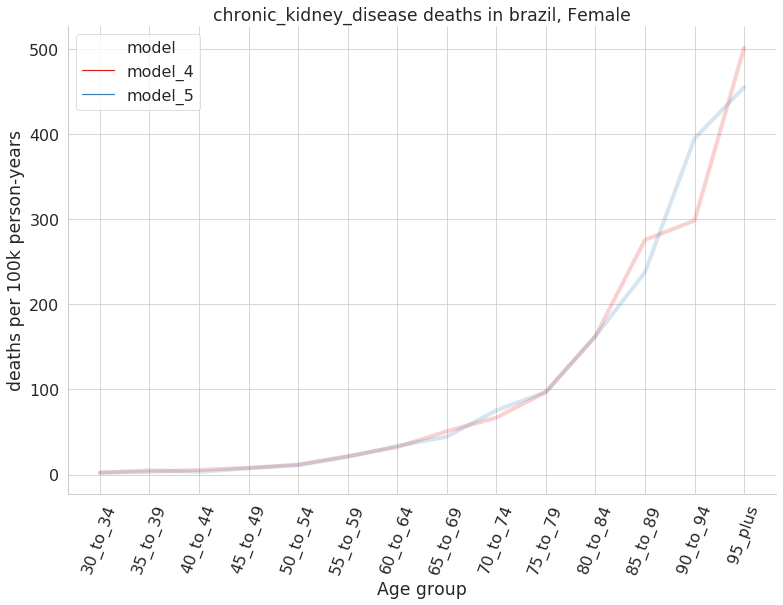

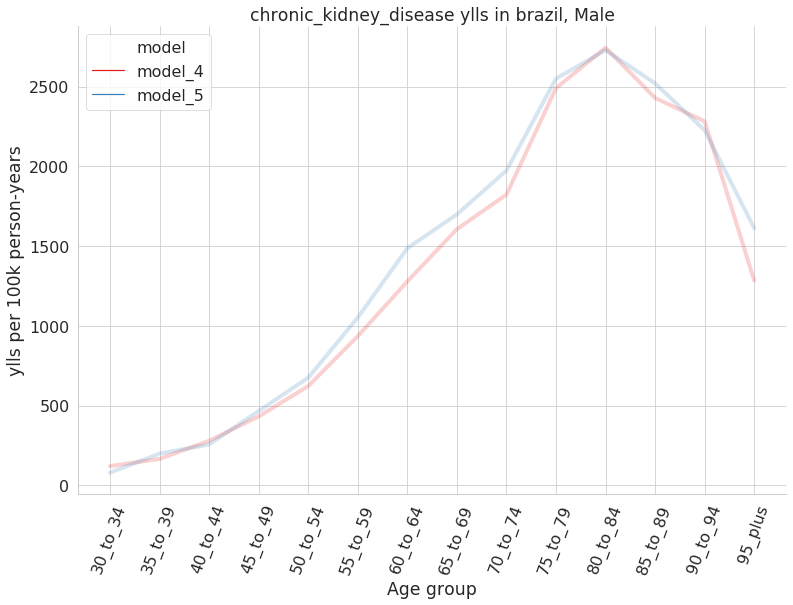

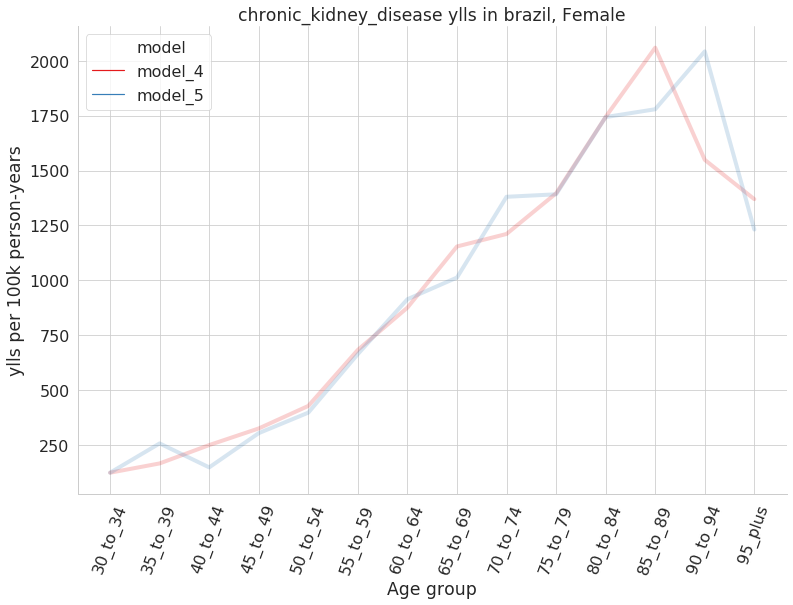

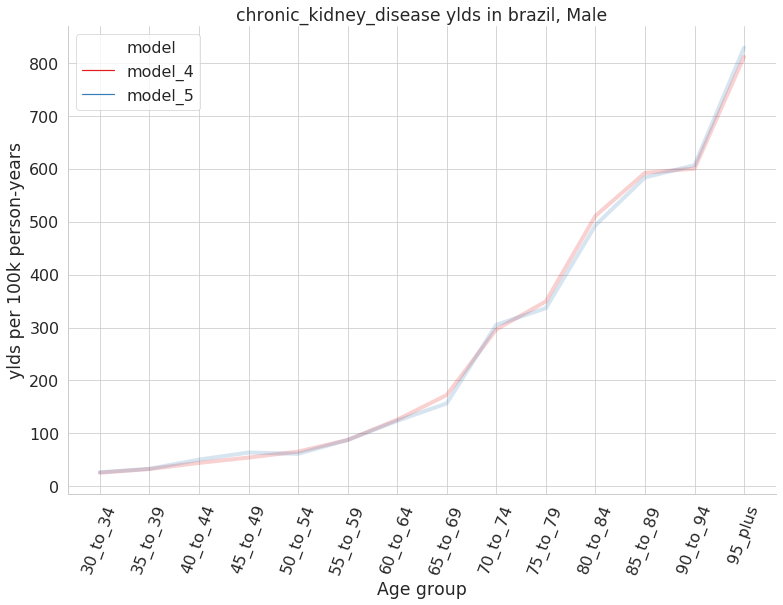

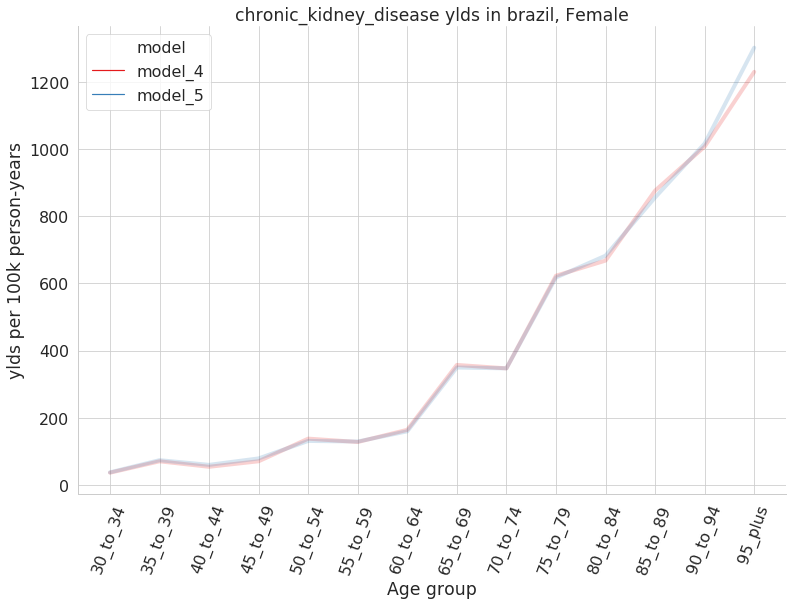

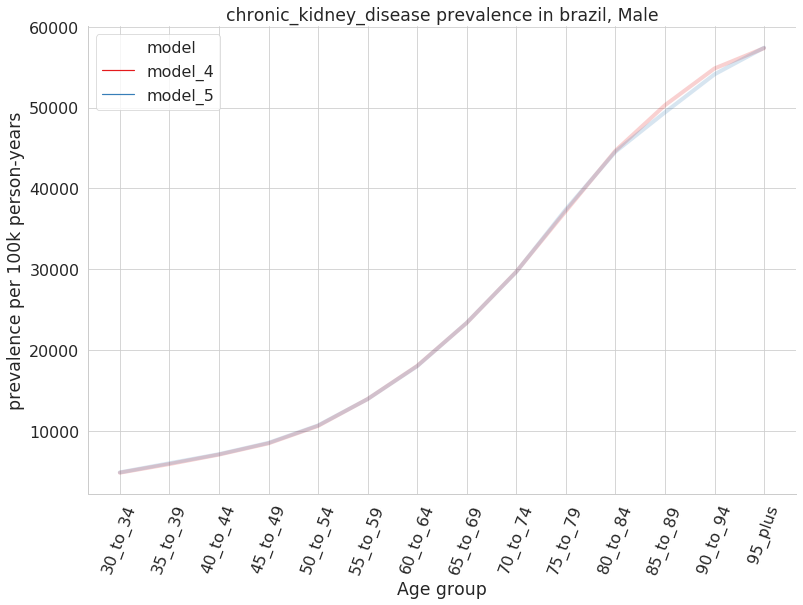

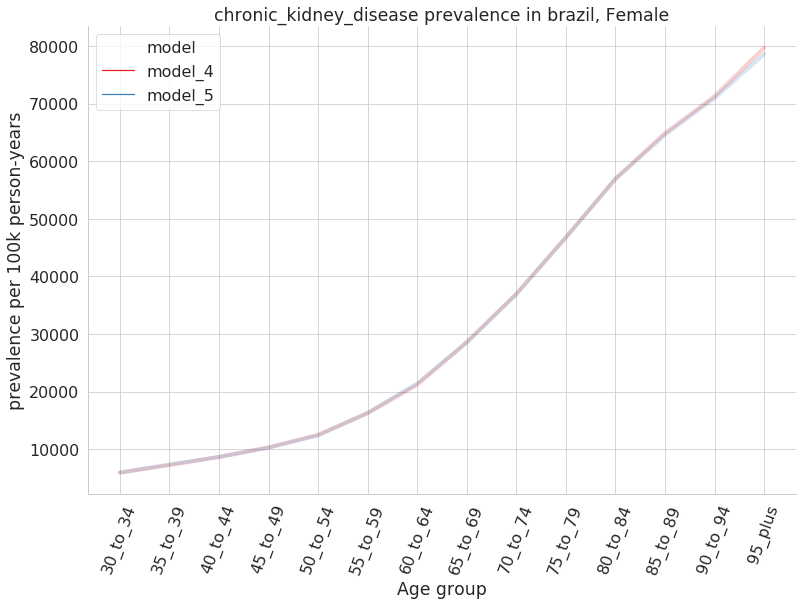

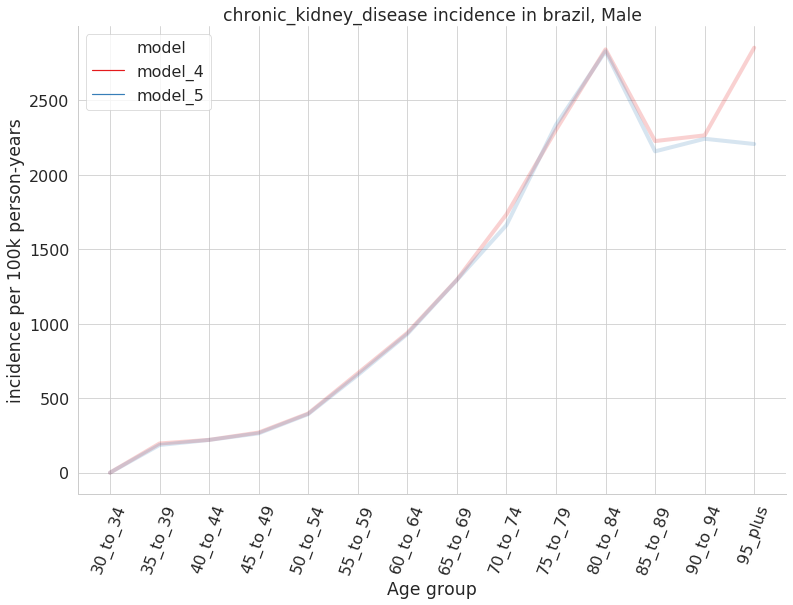

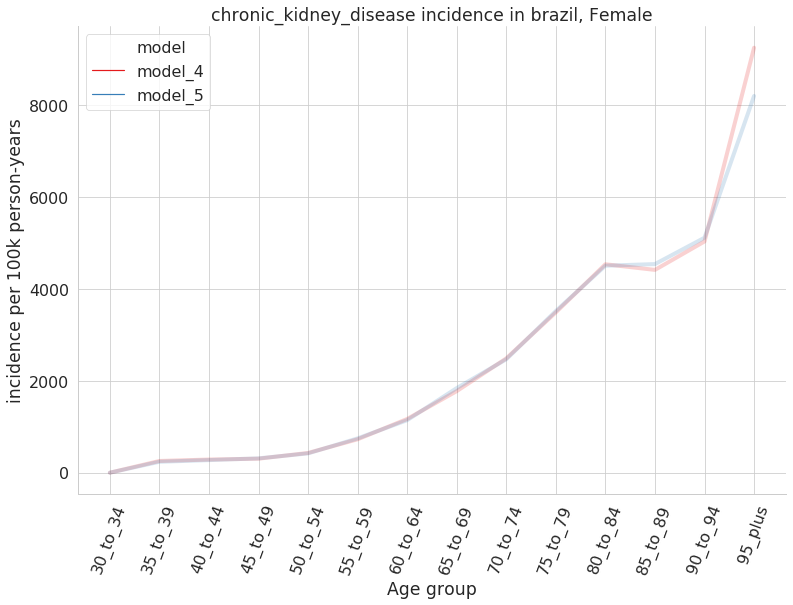

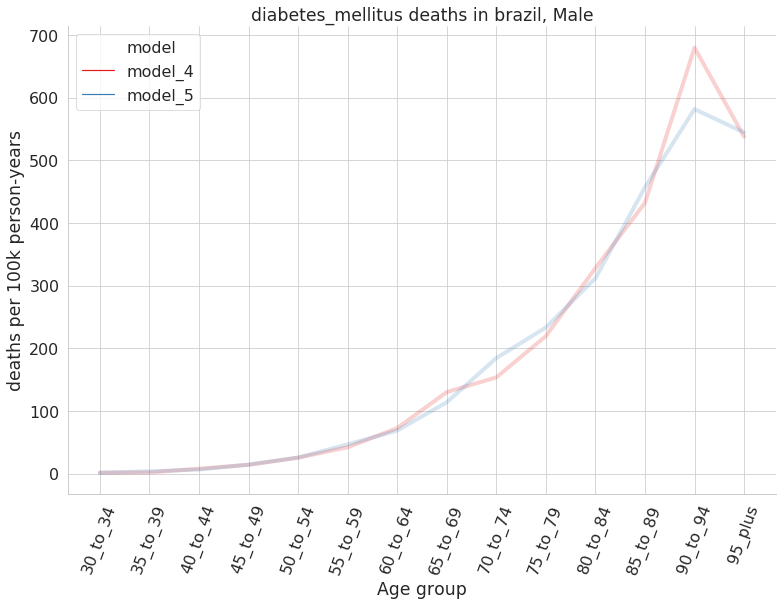

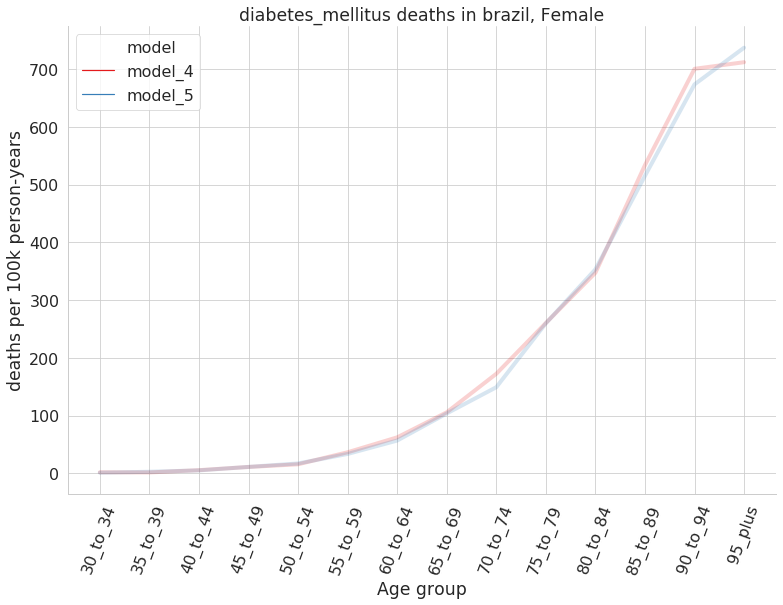

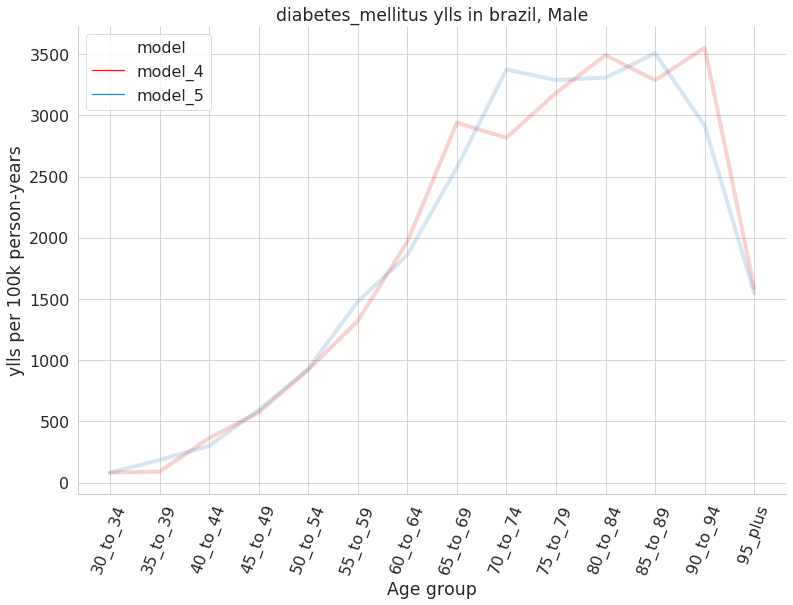

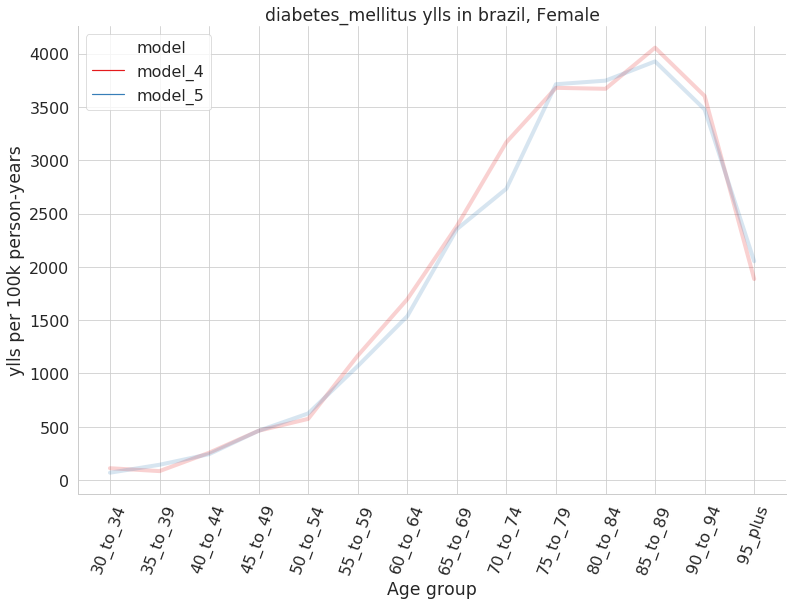

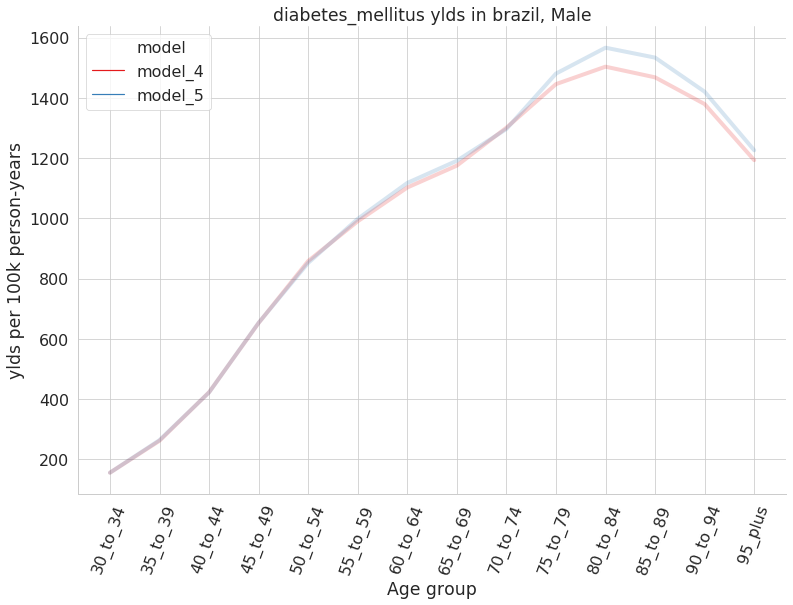

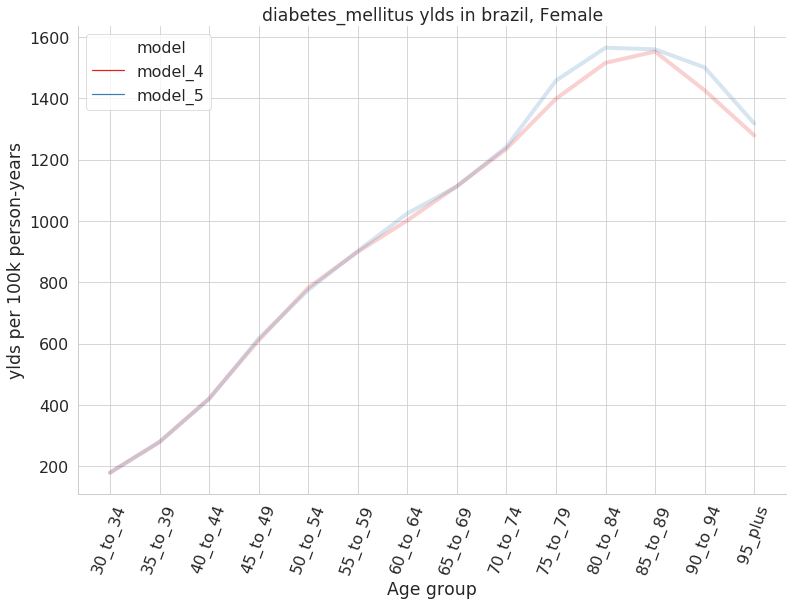

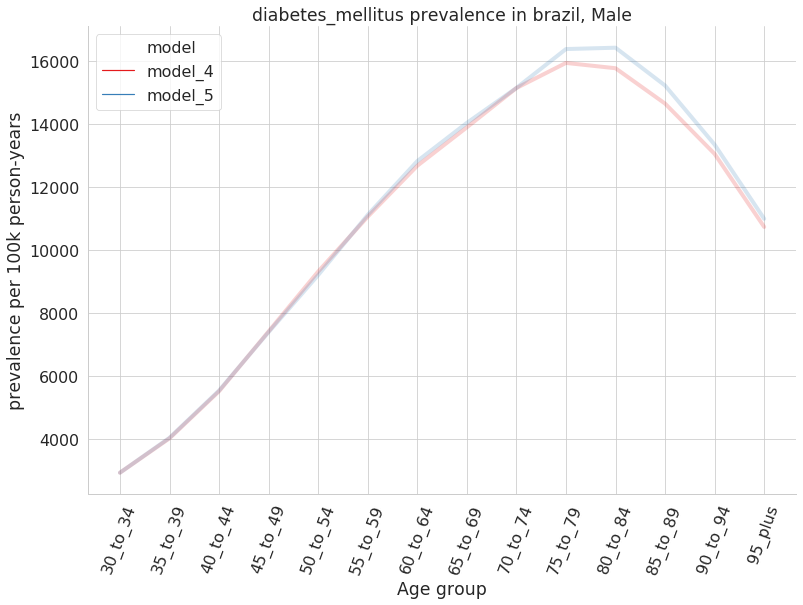

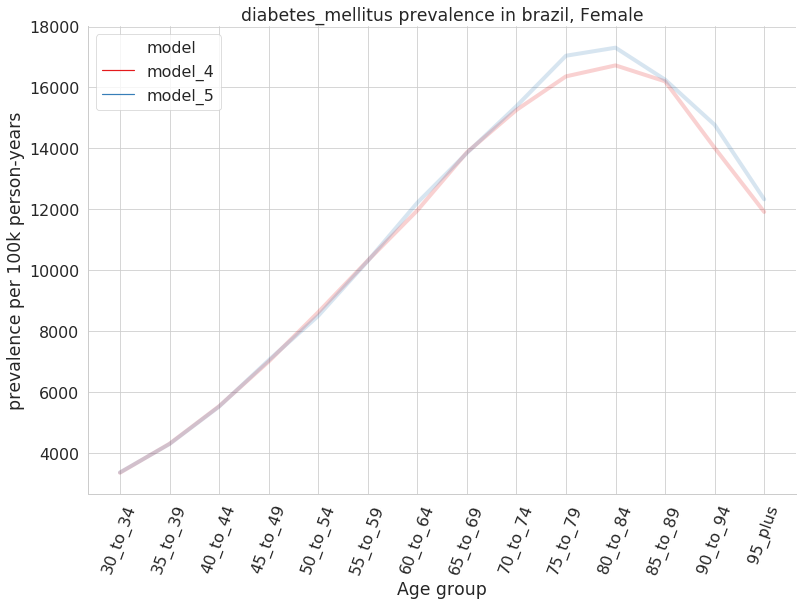

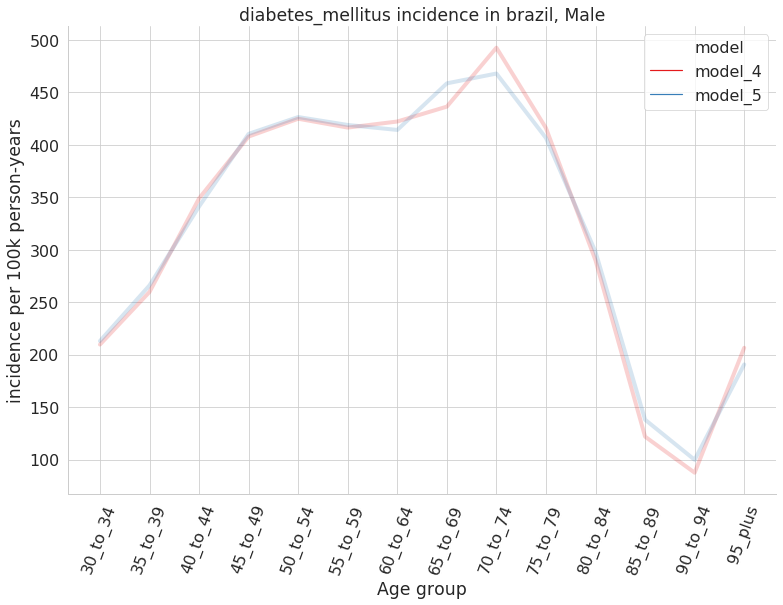

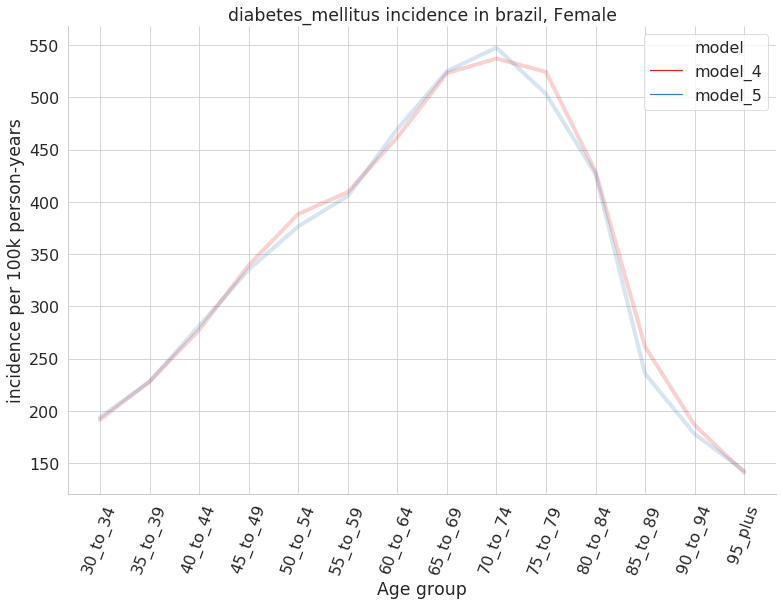

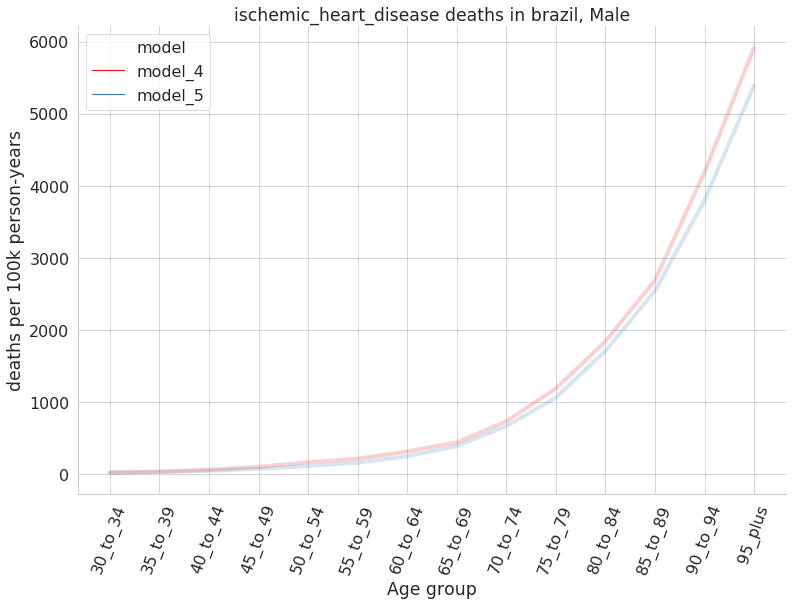

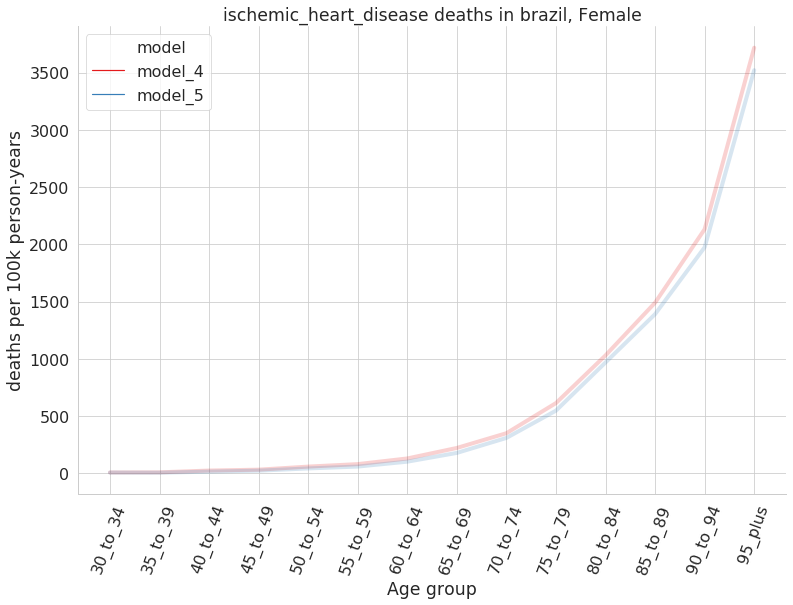

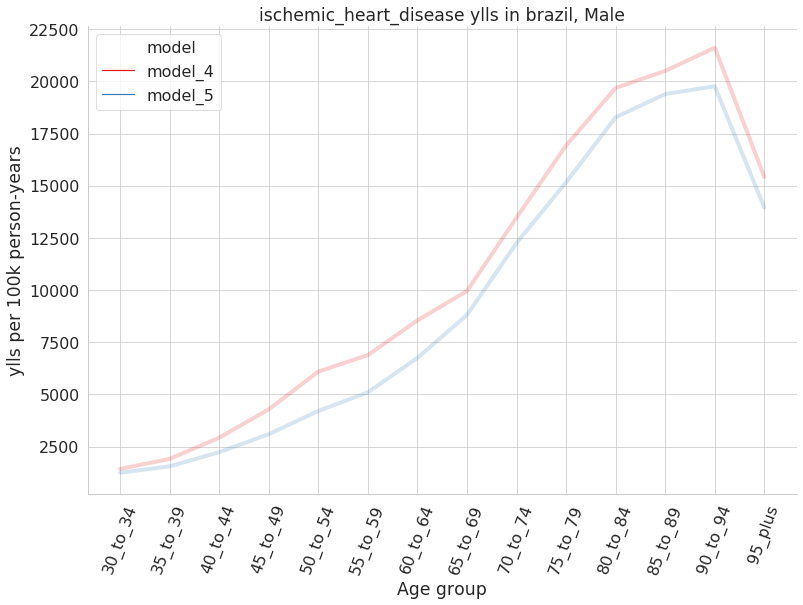

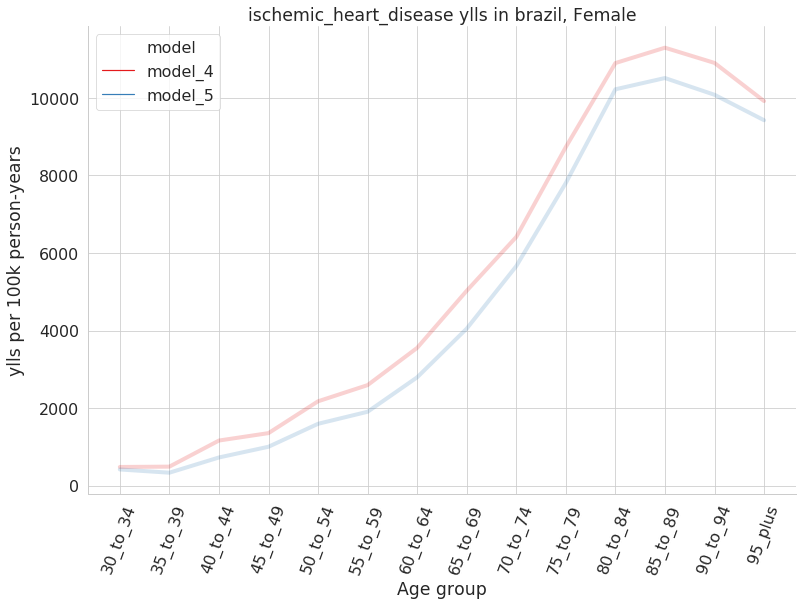

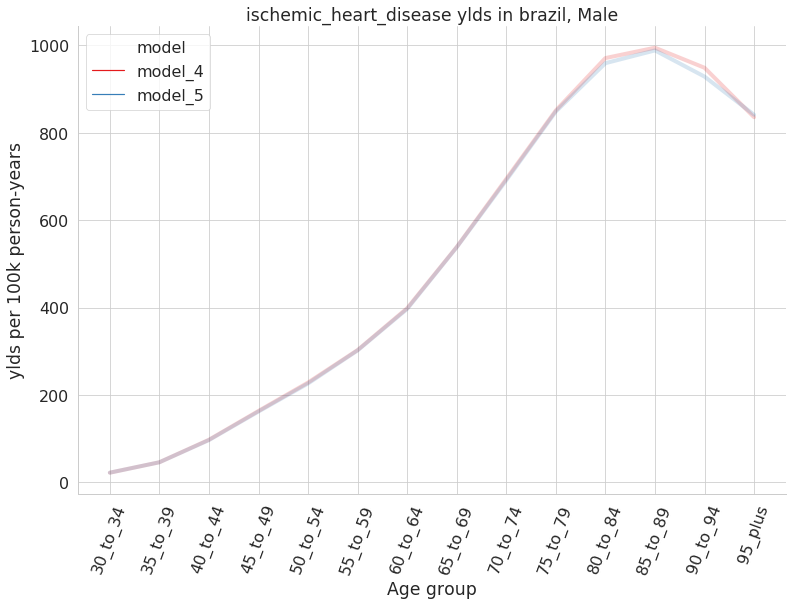

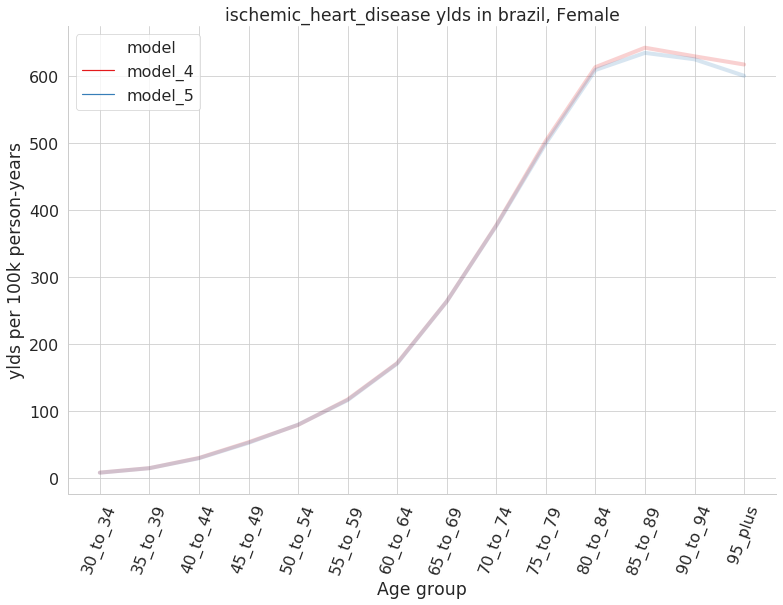

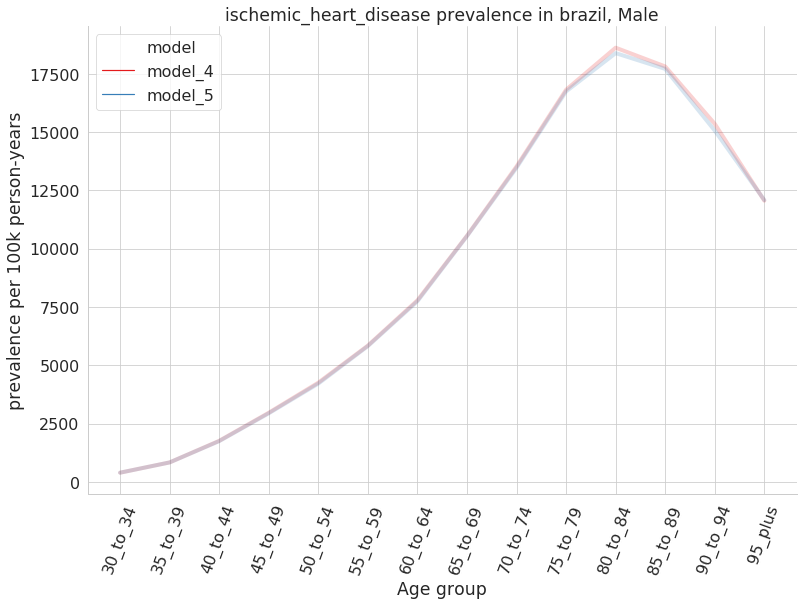

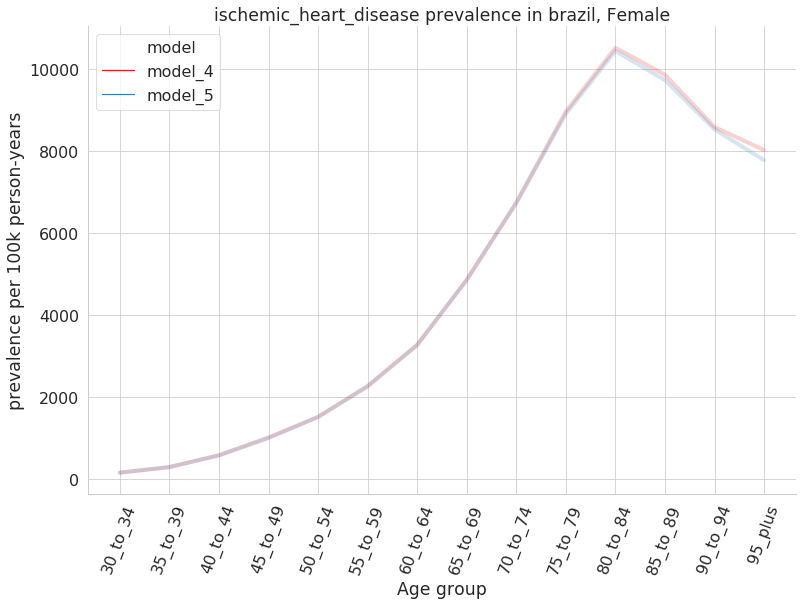

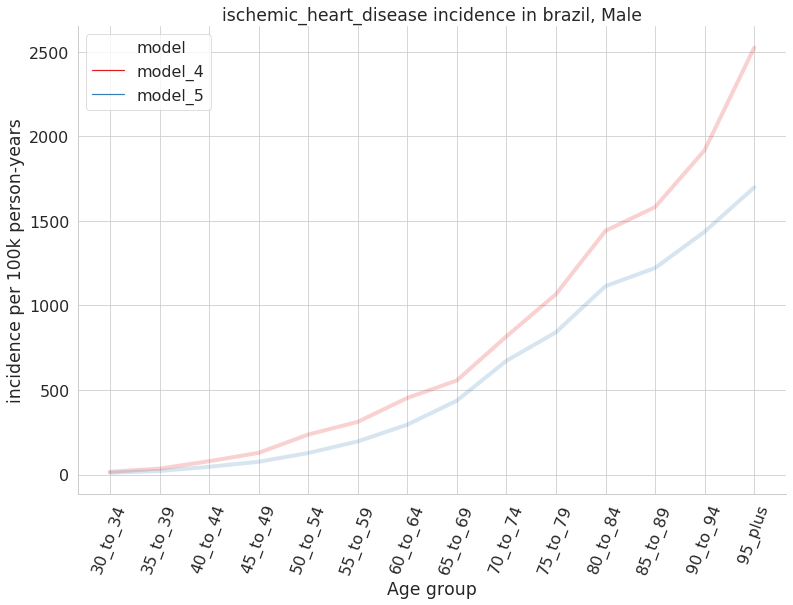

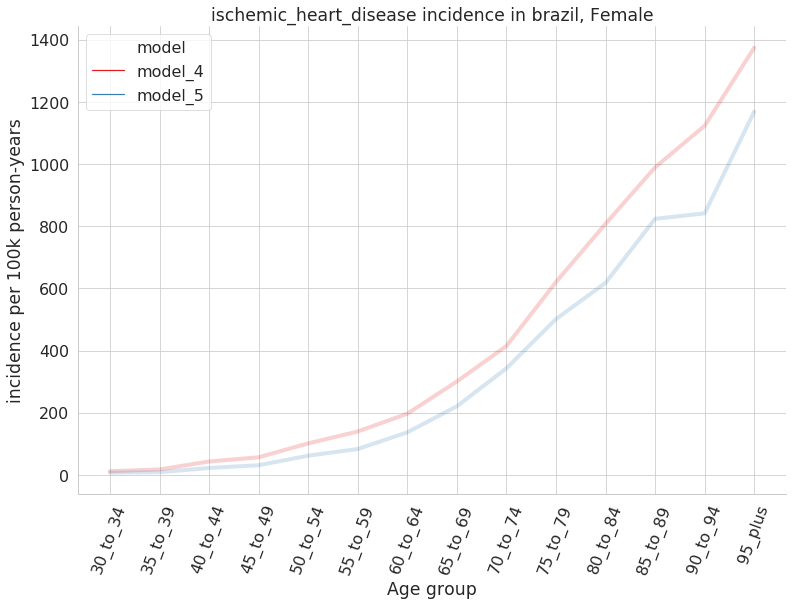

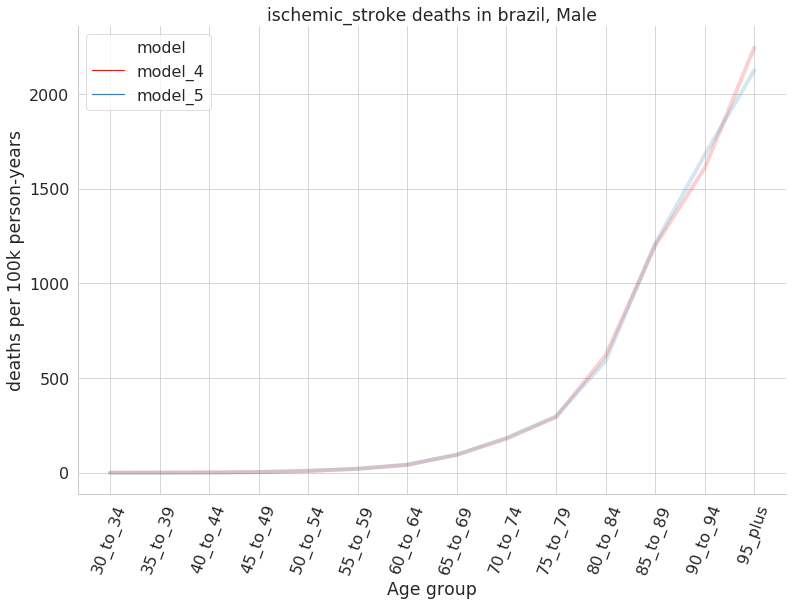

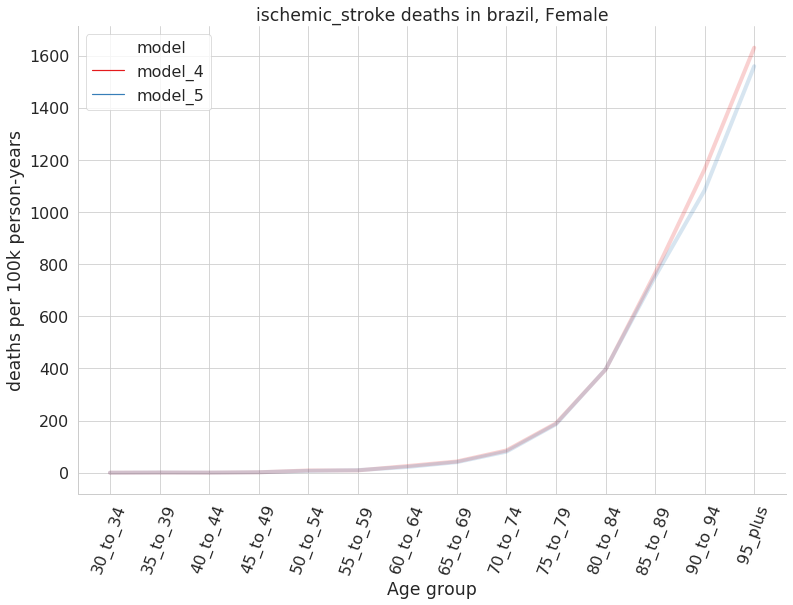

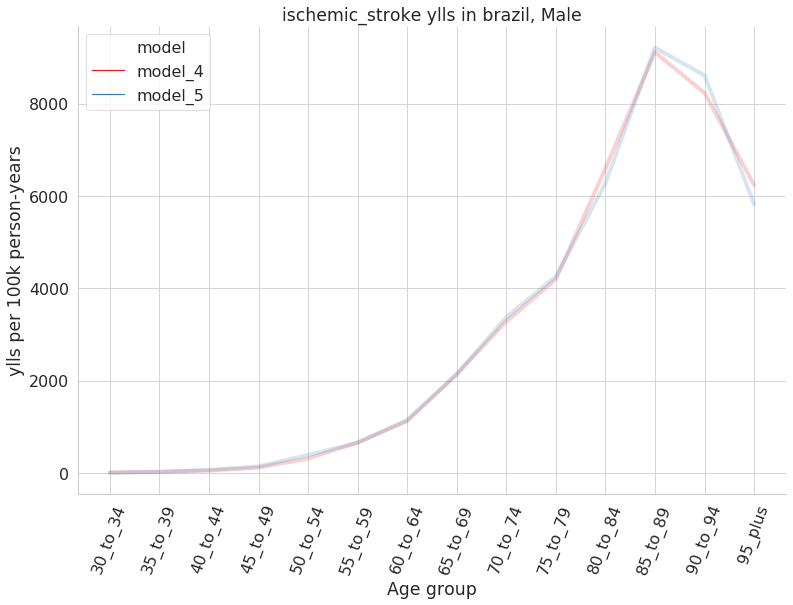

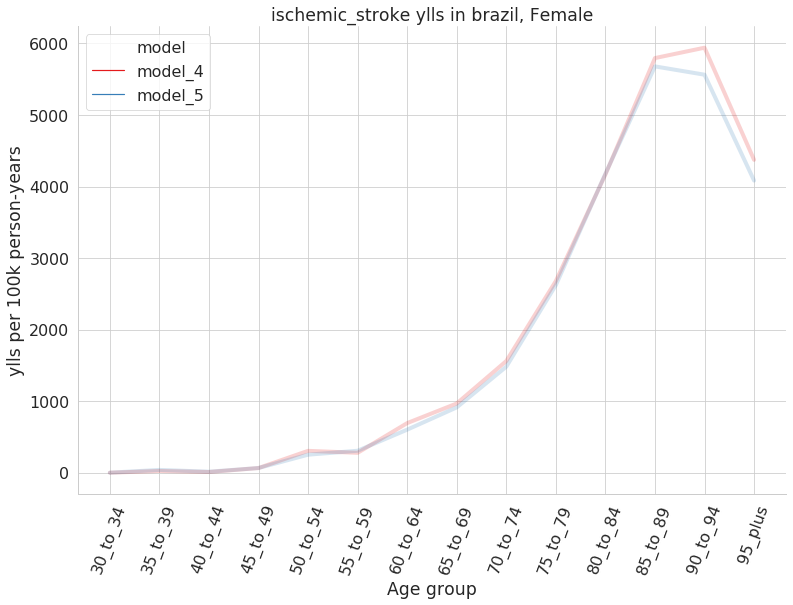

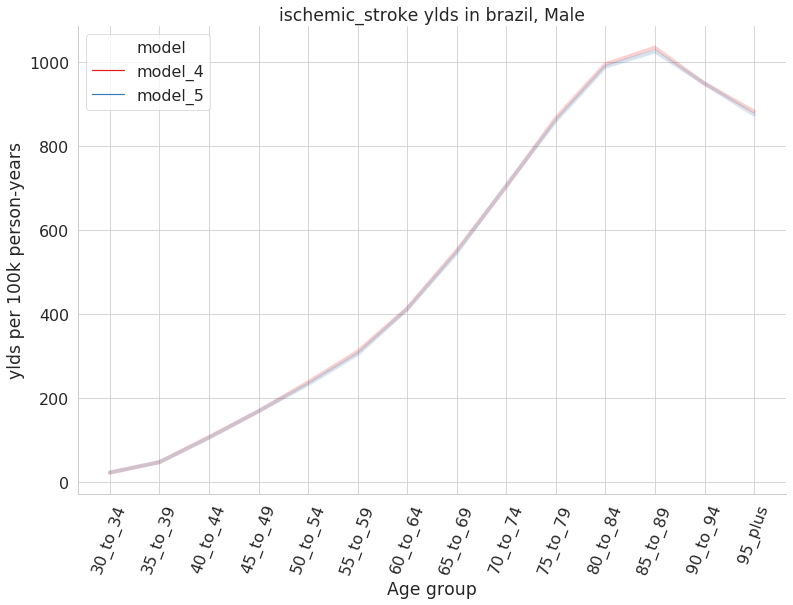

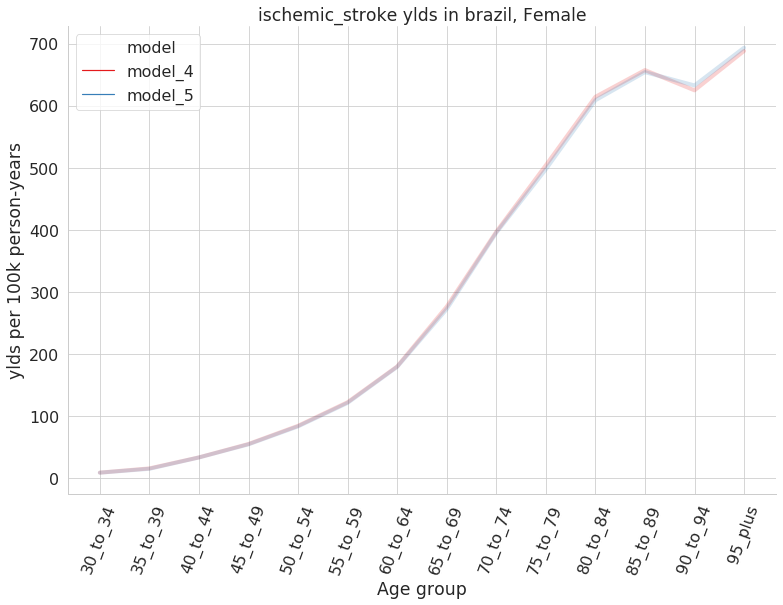

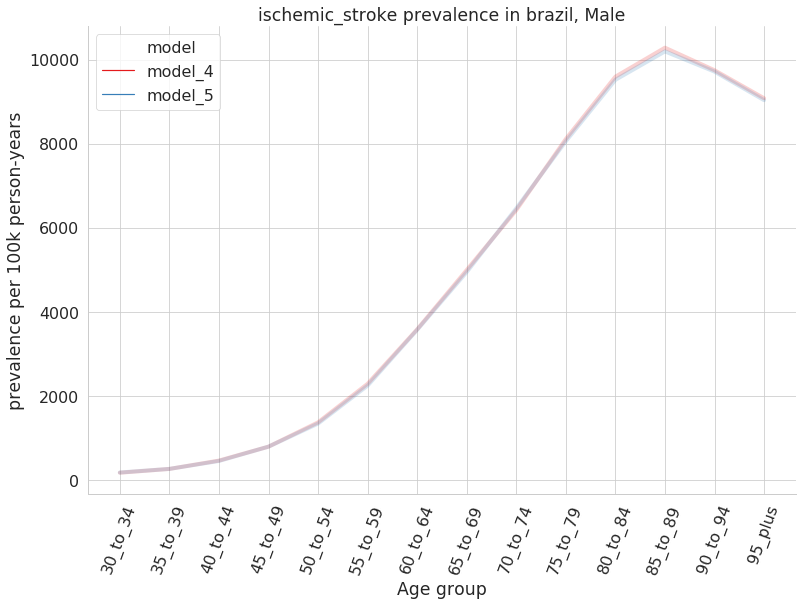

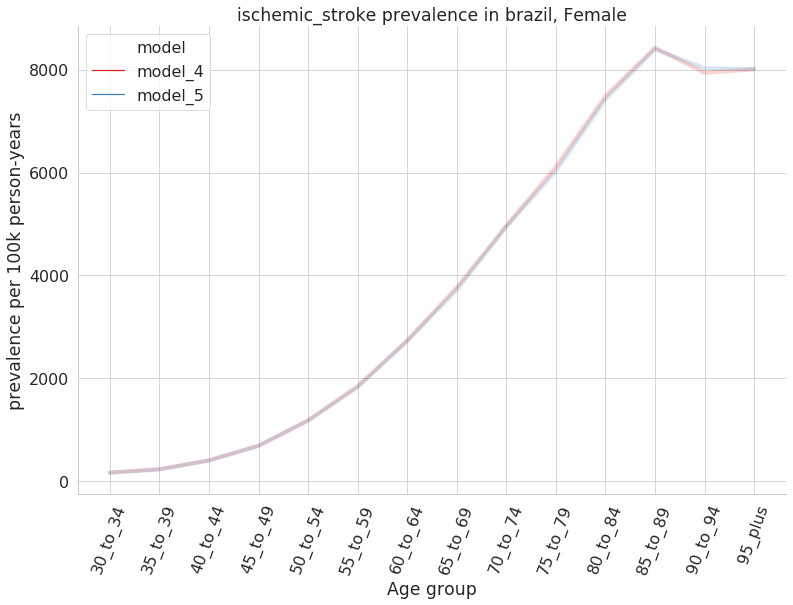

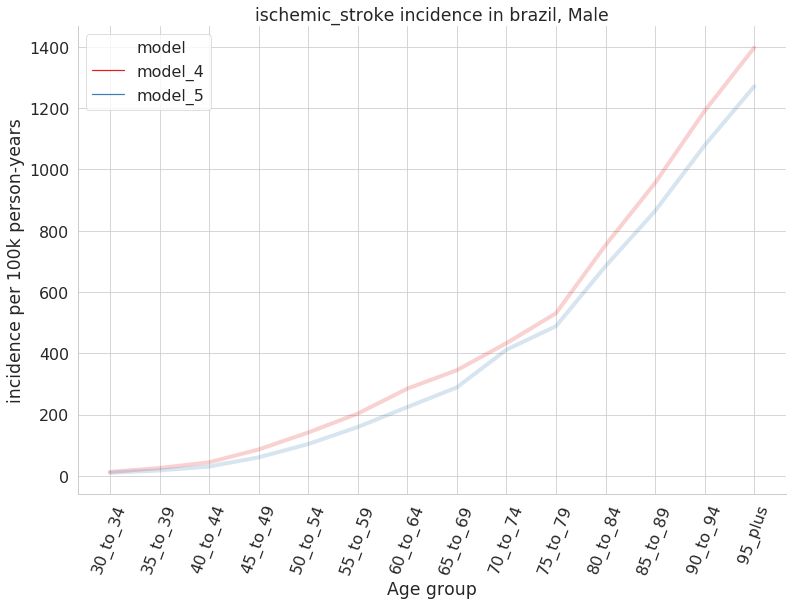

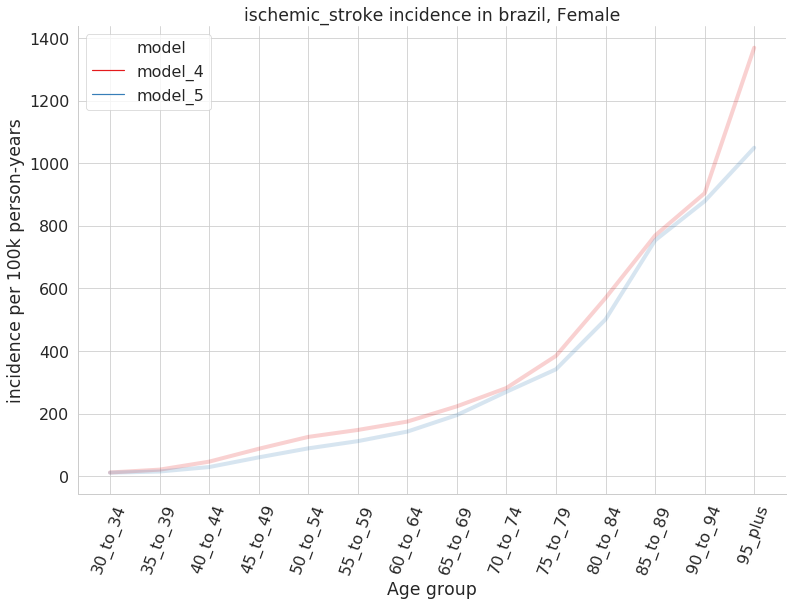

<Figure size 914.4x619.2 with 0 Axes>

In [23]:
plot_results_5_compare_model_4_cause_measure(rates_model_4, rates)